<a href="https://colab.research.google.com/github/Md-Sanzid-Bin-Hossain/Smartphone-Video-based-KAM-KFM-3D-GRFs/blob/main/Video_based_KAM_KFM_3D_GRFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import h5py
import json
import matplotlib.pyplot as plt
import numpy as np
import numpy
import statistics
from numpy import loadtxt
import matplotlib.pyplot as plt
import pandas
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statistics import stdev
import math
import h5py

import numpy as np
import time

from scipy.signal import butter,filtfilt
import sys
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
import pandas
import matplotlib.pyplot as plt

# from tsf.model import TransformerForecaster


# from tensorflow.keras.utils import np_utils
import itertools
###  Library for attention layers
import pandas as pd
import os
import numpy as np
#from tqdm import tqdm # Processing time measurement
from sklearn.model_selection import train_test_split

import statistics
import gc
import torch.nn.init as init

############################################################################################################################################################################
############################################################################################################################################################################

import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.utils.weight_norm as weight_norm


import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
from torchsummary import summary
from torch.nn.parameter import Parameter


import torch.optim as optim


from tqdm import tqdm_notebook
from sklearn.preprocessing import MinMaxScaler


from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# File path


# Data loader

In [ ]:
def extract_vel_acc(V):

  velocity_all = []
  acceleration_all = []

  for i in range(44):
      velocity, acceleration = calculate_velocity_acceleration(V[:,i])

      velocity_all.append(velocity)
      acceleration_all.append(velocity)

  return np.transpose(velocity_all), np.transpose(acceleration_all)

In [ ]:
def calculate_velocity_acceleration(position_data):
    n = len(position_data)

    # Calculate velocity
    velocity = []
    for i in range(n):
        if i == 0:
            vel = 0.0  # Set initial velocity as 0
        else:
            displacement = position_data[i] - position_data[i-1]
            time_interval = 0.01  # Assuming time intervals are uniform (e.g., 1 second)
            vel = displacement / time_interval
        velocity.append(vel)

    # Calculate acceleration
    acceleration = []
    for i in range(n):
        if i ==0:
            accel = 0.0  # Set acceleration as 0 for the first and last points
        else:
            velocity_change = velocity[i] - velocity[i-1]
            accel = velocity_change / time_interval
        acceleration.append(accel)

    return np.array(velocity), np.array(acceleration)

In [ ]:
if __name__ == '__main__':
    with h5py.File('/content/drive/My Drive/public dataset/all_17_subjects.h5', 'r') as hf:
        data_all_sub = {subject: subject_data[:] for subject, subject_data in hf.items()}
        data_fields = json.loads(hf.attrs['columns'])

In [ ]:
def data_extraction(A):
  for k in range(len(A)):
    zero_index_1=np.all(A[k:k+1,:,:] == 0, axis=0)
    zero_index = np.multiply(zero_index_1, 1)
    zero_index=np.array(zero_index)

    for i in range(len(zero_index)):
      if (sum(zero_index[i])==256):
        index=i
        break;

    # print(index)
### Taking only the stance phase of the gait
###################################################################################################################################################
    B=A[k:k+1,0:index,:]  ### Taking only the stance phase of the gait
    C_1=B.reshape((B.shape[0]*B.shape[1],B.shape[2]))
    if (k==0):
      C=C_1
    else:
      C=np.append(C,C_1,axis=0)

  index_24 = data_fields.index('body weight')
  index_25 = data_fields.index('body height')

  BW=(C[0:1, index_24]*9.8)
  BWH=(C[0:1, index_24]*9.8)*C[:, index_25]

  V=C[:,110:154]
  V=V.reshape(V.shape[0],11,4)

  V=(V-V[:,2:3,:])

  V=V.reshape(-1,44)

  velocity_all, acceleration_all = extract_vel_acc(V)

  V=V/C[0:1, index_25]


      ### IMUs- Chest, Waist, Right Foot, Right shank, Right thigh, Left Foot, Left shank, Left thigh, 2D-body coordinate
    ### 0:48- IMU, 48:92-2D body coordinate, 92:136 -2D velocity, 136:180 -2D acceleration, 180:185-- Target

  D=np.hstack((C[:,71:77],C[:,58:64],C[:,19:25],C[:,32:38],C[:,45:51],C[:,6:12],C[:,84:90],C[:,97:103],V,velocity_all, acceleration_all, C[:,3:5],-C[:, 154:155]/BW,
              -C[:, 156:157]/BW,-C[:, 155:156]/BW))



  return D

In [ ]:
data_subject_01 = data_all_sub['subject_01']
subject_1=data_extraction(data_subject_01)

print(subject_1.shape)

(84490, 185)


In [ ]:
  # index_21 = data_fields.index('plate_2_force_x')
  # print(index_21)

In [ ]:
# print(np.array(data_fields))

In [ ]:
data_subject_01 = data_all_sub['subject_01']
data_subject_02 = data_all_sub['subject_02']
data_subject_03 = data_all_sub['subject_03']
data_subject_04 = data_all_sub['subject_04']
data_subject_05 = data_all_sub['subject_05']
data_subject_06 = data_all_sub['subject_06']
data_subject_07 = data_all_sub['subject_07']
data_subject_08 = data_all_sub['subject_08']
data_subject_09 = data_all_sub['subject_09']
data_subject_10 = data_all_sub['subject_10']
data_subject_11 = data_all_sub['subject_11']
data_subject_12 = data_all_sub['subject_12']
data_subject_13 = data_all_sub['subject_13']
data_subject_14 = data_all_sub['subject_14']
data_subject_15 = data_all_sub['subject_15']
data_subject_16 = data_all_sub['subject_16']
data_subject_17 = data_all_sub['subject_17']


subject_1=data_extraction(data_subject_01)
subject_2=data_extraction(data_subject_02)
subject_3=data_extraction(data_subject_03)
subject_4=data_extraction(data_subject_04)
subject_5=data_extraction(data_subject_05)
subject_6=data_extraction(data_subject_06)
subject_7=data_extraction(data_subject_07)
subject_8=data_extraction(data_subject_08)
subject_9=data_extraction(data_subject_09)
subject_10=data_extraction(data_subject_10)
subject_11=data_extraction(data_subject_11)
subject_12=data_extraction(data_subject_12)
subject_13=data_extraction(data_subject_13)
subject_14=data_extraction(data_subject_14)
subject_15=data_extraction(data_subject_15)
subject_16=data_extraction(data_subject_16)
subject_17=data_extraction(data_subject_17)


In [ ]:
adjacency_matrix = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
                            [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                            [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
                            [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
                            [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                            [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

adjacency_matrix=torch.from_numpy(adjacency_matrix.astype(np.float32))


def graph_based_augmentation(joints, adjacency_matrix, max_rotation, max_translation):
    num_joints = joints.shape[0]

    # Apply random rotations
    theta = torch.randn(num_joints, 1) * (max_rotation * np.pi / 180)  # Convert to radians
    cos_theta = torch.cos(theta)
    sin_theta = torch.sin(theta)

    rotated_joints = torch.zeros_like(joints)
    for i in range(num_joints):
        neighbors = torch.nonzero(adjacency_matrix[i]).squeeze(1)
        rotated_joints[i] = cos_theta[i] * joints[i] + torch.sum(sin_theta[i] * joints[neighbors], dim=0)

    # Apply random translations
    translation = torch.randn(2) * max_translation

    augmented_joints = rotated_joints + translation

    return augmented_joints


def augmentation_all(V):

    joints=V
    augmented_joints_all=[]

    for i in range(len(joints)):

      joint_1=joints[i,:,0:2].squeeze(0)
      augmented_joints_1 = graph_based_augmentation(joint_1, adjacency_matrix, max_rotation=2.0, max_translation=1.0)

      joint_2=joints[i,:,2:4].squeeze(0)
      augmented_joints_2 = graph_based_augmentation(joint_2, adjacency_matrix, max_rotation=2.0, max_translation=1.0)

      augmented_joints_1=augmented_joints_1.unsqueeze(0)
      augmented_joints_2=augmented_joints_2.unsqueeze(0)

      augmented_joints=torch.cat((augmented_joints_1,augmented_joints_2),dim=-1)
      augmented_joints_all.append(augmented_joints)

    augmented_joints_all = torch.stack(augmented_joints_all, dim=0)
    augmented_joints_all=augmented_joints_all.unsqueeze(1)

    return augmented_joints_all



In [ ]:
def data_extraction_aug(A):
  for k in range(len(A)):
    zero_index_1=np.all(A[k:k+1,:,:] == 0, axis=0)
    zero_index = np.multiply(zero_index_1, 1)
    zero_index=np.array(zero_index)

    for i in range(len(zero_index)):
      if (sum(zero_index[i])==256):
        index=i
        break;

    # print(index)
### Ta2Dg only the stance phase of the gait
###################################################################################################################################################
    B=A[k:k+1,0:index,:]  ### Ta2Dg only the stance phase of the gait
    C_1=B.reshape((B.shape[0]*B.shape[1],B.shape[2]))
    if (k==0):
      C=C_1
    else:
      C=np.append(C,C_1,axis=0)

  index_24 = data_fields.index('body weight')
  index_25 = data_fields.index('body height')

  BW=(C[0:1, index_24]*9.8)
  BWH=(C[0:1, index_24]*9.8)*C[:, index_25]

  V=C[:,110:154]
  V=V.reshape(V.shape[0],11,4)

  V=(V-V[:,2:3,:])

  V=augmentation_all(torch.from_numpy(V))
  V=V.reshape(-1,44)
  velocity_all, acceleration_all = extract_vel_acc(V)

  V=V/C[0:1, index_25]


      ### IMUs- Chest, Waist, Right Foot, Right shank, Right thigh, Left Foot, Left shank, Left thigh, 2D-body coordinate
    ### 0:48- IMU, 48:92-2D body coordinate, 92:136 -2D velocity, 136:180 -2D acceleration, 180:185-- Target

  D=np.hstack((C[:,71:77],C[:,58:64],C[:,19:25],C[:,32:38],C[:,45:51],C[:,6:12],C[:,84:90],C[:,97:103],V,velocity_all, acceleration_all, C[:,3:5],-C[:, 154:155]/BW,
              -C[:, 156:157]/BW,-C[:, 155:156]/BW))

  return D


In [ ]:
data_subject_01 = data_all_sub['subject_01']
subject_1_aug=data_extraction_aug(data_subject_01)

print(subject_1.shape)

(84490, 185)


In [ ]:
subject_1.shape

(84490, 185)

# Data processing

In [ ]:
main_dir = "/content/drive/My Drive/public dataset/Public_dataset_2/Subject01"
os.mkdir(main_dir)
path="/content/"
subject='Subject_01'

In [ ]:
train_dataset=np.concatenate((subject_1,subject_2,subject_3,subject_4,subject_5,subject_6,subject_7,subject_8,subject_9,subject_10,subject_11,
                              subject_12,subject_13,subject_15,subject_16,subject_17),axis=0)

test_dataset=subject_14

encoder='LSTM'

In [ ]:
# Train features #
from sklearn.preprocessing import StandardScaler

# x_train_1=train_dataset[:,0:18]
# x_train_2=train_dataset[:,23:67]

# x_train=np.concatenate((x_train_1,x_train_2),axis=1)

x_train=train_dataset[:,0:180]


scale= StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
train_X_1_1=x_train

# # Test features #
# x_test_1=test_dataset[:,0:18]
# x_test_2=test_dataset[:,23:67]

# x_test=np.concatenate((x_test_1,x_test_2),axis=1)

x_test=test_dataset[:,0:180]

test_X_1_1=x_test

m1=180
m2=185


  ### Label ###

train_y_1_1=train_dataset[:,m1:m2]
test_y_1_1=test_dataset[:,m1:m2]

train_dataset_1=np.concatenate((train_X_1_1,train_y_1_1),axis=1)
test_dataset_1=np.concatenate((test_X_1_1,test_y_1_1),axis=1)

train_dataset_1=pd.DataFrame(train_dataset_1)
test_dataset_1=pd.DataFrame(test_dataset_1)

train_dataset_1.dropna(axis=0,inplace=True)
test_dataset_1.dropna(axis=0,inplace=True)

train_dataset_1=np.array(train_dataset_1)
test_dataset_1=np.array(test_dataset_1)

train_dataset_sum = np. sum(train_dataset_1)
array_has_nan = np. isinf(train_dataset_1[:,48:180])

print(array_has_nan)

print(train_dataset_1.shape)



train_X_1=train_dataset_1[:,0:m1]
test_X_1=test_dataset_1[:,0:m1]

train_y_1=train_dataset_1[:,m1:m2]
test_y_1=test_dataset_1[:,m1:m2]



L1=len(train_X_1)
L2=len(test_X_1)


w=50



a1=L1//w
b1=L1%w

a2=L2//w
b2=L2%w

# a3=L3//w
# b3=L3%w

     #### Features ####
train_X_2=train_X_1[L1-w+b1:L1,:]
test_X_2=test_X_1[L2-w+b2:L2,:]
# validation_X_2=validation_X_1[L3-w+b3:L3,:]


    #### Output ####

train_y_2=train_y_1[L1-w+b1:L1,:]
test_y_2=test_y_1[L2-w+b2:L2,:]
# validation_y_2=validation_y_1[L3-w+b3:L3,:]



     #### Features ####

train_X=np.concatenate((train_X_1,train_X_2),axis=0)
test_X=np.concatenate((test_X_1,test_X_2),axis=0)
# validation_X=np.concatenate((validation_X_1,validation_X_2),axis=0)


    #### Output ####

train_y=np.concatenate((train_y_1,train_y_2),axis=0)
test_y=np.concatenate((test_y_1,test_y_2),axis=0)
# validation_y=np.concatenate((validation_y_1,validation_y_2),axis=0)


print(train_y.shape)
    #### Reshaping ####
train_X_3_p= train_X.reshape((a1+1,w,train_X.shape[1]))
test_X = test_X.reshape((a2+1,w,test_X.shape[1]))


train_y_3_p= train_y.reshape((a1+1,w,5))
test_y= test_y.reshape((a2+1,w,5))



# train_X_1D=train_X_3
test_X_1D=test_X

train_X_3=train_X_3_p
train_y_3=train_y_3_p
# print(train_X_4.shape,train_y_3.shape)


train_X_1D, X_validation_1D, train_y_5, Y_validation = train_test_split(train_X_3,train_y_3, test_size=0.20, random_state=True)
#train_X_1D, X_validation_1D_ridge, train_y, Y_validation_ridge = train_test_split(train_X_1D_m,train_y_m, test_size=0.10, random_state=True)   [0:2668,:,:]

print(train_X_1D.shape,train_y_5.shape,X_validation_1D.shape,Y_validation.shape)


s=test_X_1D.shape[0]*w

gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(1245808, 185)
(1245850, 5)
(19933, 50, 180) (19933, 50, 5) (4984, 50, 180) (4984, 50, 5)


0

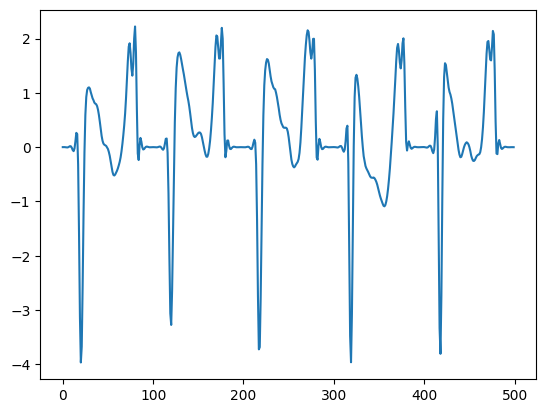

In [ ]:
plt.plot(test_y[0:10,:,0].reshape(500,1))

In [ ]:
# from numpy import savetxt
# savetxt('train_data_check.csv', train_dataset_1[:,48:92], delimiter=',')

In [ ]:
### IMUs- Chest, Waist, Right Foot, Right shank, Right thigh, Left Foot, Left shank, Left thigh, 2D-body coordinate
### 0:48- IMU, 48:92-2D body coordinate, 92:97-- Target


### Data Processing

batch_size = 64

val_targets = torch.Tensor(Y_validation)
test_features = torch.Tensor(test_X_1D)
test_targets = torch.Tensor(test_y)


## all Modality Features

train_features = torch.Tensor(train_X_1D)
train_targets = torch.Tensor(train_y_5)
val_features = torch.Tensor(X_validation_1D)


train_features_acc_8=torch.cat((train_features[:,:,0:3],train_features[:,:,6:9],train_features[:,:,12:15],train_features[:,:,18:21],train_features[:,:,24:27]\
                             ,train_features[:,:,30:33],train_features[:,:,36:39],train_features[:,:,42:45]),axis=-1)
test_features_acc_8=torch.cat((test_features[:,:,0:3],test_features[:,:,6:9],test_features[:,:,12:15],test_features[:,:,18:21],test_features[:,:,24:27]\
                             ,test_features[:,:,30:33],test_features[:,:,36:39],test_features[:,:,42:45]),axis=-1)
val_features_acc_8=torch.cat((val_features[:,:,0:3],val_features[:,:,6:9],val_features[:,:,12:15],val_features[:,:,18:21],val_features[:,:,24:27]\
                             ,val_features[:,:,30:33],val_features[:,:,36:39],val_features[:,:,42:45]),axis=-1)


train_features_gyr_8=torch.cat((train_features[:,:,3:6],train_features[:,:,9:12],train_features[:,:,15:18],train_features[:,:,21:24],train_features[:,:,27:30]\
                             ,train_features[:,:,33:36],train_features[:,:,39:42],train_features[:,:,45:48]),axis=-1)
test_features_gyr_8=torch.cat((test_features[:,:,3:6],test_features[:,:,9:12],test_features[:,:,15:18],test_features[:,:,21:24],test_features[:,:,27:30]\
                             ,test_features[:,:,33:36],test_features[:,:,39:42],test_features[:,:,45:48]),axis=-1)
val_features_gyr_8=torch.cat((val_features[:,:,3:6],val_features[:,:,9:12],val_features[:,:,15:18],val_features[:,:,21:24],val_features[:,:,27:30]\
                             ,val_features[:,:,33:36],val_features[:,:,39:42],val_features[:,:,45:48]),axis=-1)


train_features_2D_point=train_features[:,:,48:92]
test_features_2D_point=test_features[:,:,48:92]
val_features_2D_point=val_features[:,:,48:92]


train_features_2D_velocity=train_features[:,:,92:136]
test_features_2D_velocity=test_features[:,:,92:136]
val_features_2D_velocity=val_features[:,:,92:136]


train_features_2D_acceleration=train_features[:,:,136:180]
test_features_2D_acceleration=test_features[:,:,136:180]
val_features_2D_acceleration=val_features[:,:,136:180]


train = TensorDataset(train_features, train_features_acc_8,train_features_gyr_8, train_features_2D_point,train_features_2D_velocity,train_features_2D_acceleration, train_targets)
val = TensorDataset(val_features, val_features_acc_8, val_features_gyr_8, val_features_2D_point, val_features_2D_velocity, val_features_2D_acceleration, val_targets)
test = TensorDataset(test_features, test_features_acc_8, test_features_gyr_8, test_features_2D_point,test_features_2D_velocity,test_features_2D_acceleration, test_targets)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=True, drop_last=False)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=True, drop_last=False)


# Important Functions

In [ ]:
def RMSE_prediction(yhat_4,test_y,s):

  s1=yhat_4.shape[0]*yhat_4.shape[1]

  test_o=test_y.reshape((s1,5))
  yhat=yhat_4.reshape((s1,5))




  y_1_no=yhat[:,0]
  y_2_no=yhat[:,1]
  y_3_no=yhat[:,2]
  y_4_no=yhat[:,3]
  y_5_no=yhat[:,4]
  # y_6_no=yhat[:,5]
  # y_7_no=yhat[:,6]
  #y_8_no=yhat[:,7]
  #y_9_no=yhat[:,8]
  #y_10_no=yhat[:,9]


  y_1=y_1_no
  y_2=y_2_no
  y_3=y_3_no
  y_4=y_4_no
  y_5=y_5_no



  y_test_1=test_o[:,0]
  y_test_2=test_o[:,1]
  y_test_3=test_o[:,2]
  y_test_4=test_o[:,3]
  y_test_5=test_o[:,4]
  # y_test_6=test_o[:,5]
  # y_test_7=test_o[:,6]
  #y_test_8=test_o[:,7]
  #y_test_9=test_o[:,8]
  #y_test_10=test_o[:,9]





  #print(y_1.shape,y_test_1.shape)




  Z_1=y_1
  Z_2=y_2
  Z_3=y_3
  Z_4=y_4
  Z_5=y_5
  # Z_6=y_6
  # Z_7=y_7
  #Z_8=y_8
  #Z_9=y_9
  #Z_10=y_10



  ###calculate RMSE

  rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
  rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
  rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
  rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
  rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
  # rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
  # rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
  #rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
  #rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100
  #rmse_10 =((np.sqrt(mean_squared_error(y_test_10,y_10)))/(max(y_test_10)-min(y_test_10)))*100


  print(rmse_1)
  print(rmse_2)
  print(rmse_3)
  print(rmse_4)
  print(rmse_5)
  # print(rmse_6)
  # print(rmse_7)
  #print(rmse_8)
  #print(rmse_9)
  #print(rmse_10)


  p_1=np.corrcoef(y_1, y_test_1)[0, 1]
  p_2=np.corrcoef(y_2, y_test_2)[0, 1]
  p_3=np.corrcoef(y_3, y_test_3)[0, 1]
  p_4=np.corrcoef(y_4, y_test_4)[0, 1]
  p_5=np.corrcoef(y_5, y_test_5)[0, 1]
  # p_6=np.corrcoef(y_6, y_test_6)[0, 1]
  # p_7=np.corrcoef(y_7, y_test_7)[0, 1]
  #p_8=np.corrcoef(y_8, y_test_8)[0, 1]
  #p_9=np.corrcoef(y_9, y_test_9)[0, 1]
  #p_10=np.corrcoef(y_10, y_test_10)[0, 1]


  print("\n")
  print(p_1)
  print(p_2)
  print(p_3)
  print(p_4)
  print(p_5)
  # print(p_6)
  # print(p_7)
  #print(p_8)
  #print(p_9)
  #print(p_10)


              ### Correlation ###
  p=np.array([p_1,p_2,p_3,p_4,p_5])




      #### Mean and standard deviation ####

  rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5])

      #### Mean and standard deviation ####
  m=statistics.mean(rmse)
  SD=statistics.stdev(rmse)
  print('Mean: %.3f' % m,'+/- %.3f' %SD)

  m_c=statistics.mean(p)
  SD_c=statistics.stdev(p)
  print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)



  return rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5


############################################################################################################################################################################################################################################################################################################################################################################################################################################################################
def RMSE_prediction_WN(yhat_4,test_y,s):

  test_o=test_y.reshape((s,5))
  yhat=yhat_4.reshape((s,5))




  y_1_no=yhat[:,0]
  y_2_no=yhat[:,1]
  y_3_no=yhat[:,2]
  y_4_no=yhat[:,3]
  y_5_no=yhat[:,4]
  # y_6_no=yhat[:,5]
  # y_7_no=yhat[:,6]
  #y_8_no=yhat[:,7]
  #y_9_no=yhat[:,8]
  #y_10_no=yhat[:,9]




  y_test_1=test_o[:,0]
  y_test_2=test_o[:,1]
  y_test_3=test_o[:,2]
  y_test_4=test_o[:,3]
  y_test_5=test_o[:,4]
  # y_test_6=test_o[:,5]
  # y_test_7=test_o[:,6]
  #y_test_8=test_o[:,7]
  #y_test_9=test_o[:,8]
  #y_test_10=test_o[:,9]





  #print(y_1.shape,y_test_1.shape)



  cutoff=6
  fs=200
  order=4

  nyq = 0.5 * fs
  ## filtering data ##
  def butter_lowpass_filter(data, cutoff, fs, order):
      normal_cutoff = cutoff / nyq
      # Get the filter coefficients
      b, a = butter(order, normal_cutoff, btype='low', analog=False)
      y = filtfilt(b, a, data)
      return y



  y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
  y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
  y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
  y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
  y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
  # y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)
  # y_7=butter_lowpass_filter(y_7_no, cutoff, fs, order)
  #y_8=butter_lowpass_filter(y_8_no, cutoff, fs, order)
  #y_9=butter_lowpass_filter(y_9_no, cutoff, fs, order)
  #y_10=butter_lowpass_filter(y_10_no, cutoff, fs, order)




  Z_1=y_1
  Z_2=y_2
  Z_3=y_3
  Z_4=y_4
  Z_5=y_5
  # Z_6=y_6
  # Z_7=y_7
  #Z_8=y_8
  #Z_9=y_9
  #Z_10=y_10



  ###calculate RMSE

  rmse_1 =np.sqrt(mean_squared_error(y_test_1,y_1))
  rmse_2 =np.sqrt(mean_squared_error(y_test_2,y_2))
  rmse_3 =np.sqrt(mean_squared_error(y_test_3,y_3))
  rmse_4 =np.sqrt(mean_squared_error(y_test_4,y_4))
  rmse_5 =np.sqrt(mean_squared_error(y_test_5,y_5))
  # rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
  # rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
  #rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
  #rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100
  #rmse_10 =((np.sqrt(mean_squared_error(y_test_10,y_10)))/(max(y_test_10)-min(y_test_10)))*100


  print(rmse_1)
  print(rmse_2)
  print(rmse_3)
  print(rmse_4)
  print(rmse_5)
  # print(rmse_6)
  # print(rmse_7)
  #print(rmse_8)
  #print(rmse_9)
  #print(rmse_10)


  p_1=np.corrcoef(y_1, y_test_1)[0, 1]
  p_2=np.corrcoef(y_2, y_test_2)[0, 1]
  p_3=np.corrcoef(y_3, y_test_3)[0, 1]
  p_4=np.corrcoef(y_4, y_test_4)[0, 1]
  p_5=np.corrcoef(y_5, y_test_5)[0, 1]
  # p_6=np.corrcoef(y_6, y_test_6)[0, 1]
  # p_7=np.corrcoef(y_7, y_test_7)[0, 1]
  #p_8=np.corrcoef(y_8, y_test_8)[0, 1]
  #p_9=np.corrcoef(y_9, y_test_9)[0, 1]
  #p_10=np.corrcoef(y_10, y_test_10)[0, 1]


  print("\n")
  print(p_1)
  print(p_2)
  print(p_3)
  print(p_4)
  print(p_5)
  # print(p_6)
  # print(p_7)
  #print(p_8)
  #print(p_9)
  #print(p_10)


              ### Correlation ###
  p=np.array([p_1,p_2,p_3,p_4,p_5])




      #### Mean and standard deviation ####

  rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5])

      #### Mean and standard deviation ####
  m=statistics.mean(rmse)
  SD=statistics.stdev(rmse)
  print('Mean: %.3f' % m,'+/- %.3f' %SD)

  m_c=statistics.mean(p)
  SD_c=statistics.stdev(p)
  print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)



  return rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5


############################################################################################################################################################################################################################################################################################################################################################################################################################################################################


def PCC_prediction(yhat_4,test_y,s):

  test_o=test_y.reshape((s,5))
  yhat=yhat_4.reshape((s,5))



  y_1_no=yhat[:,0]
  y_2_no=yhat[:,1]
  y_3_no=yhat[:,2]
  y_4_no=yhat[:,3]
  y_5_no=yhat[:,4]
  # y_6_no=yhat[:,5]
  # y_7_no=yhat[:,6]


  y_test_1=test_o[:,0]
  y_test_2=test_o[:,1]
  y_test_3=test_o[:,2]
  y_test_4=test_o[:,3]
  y_test_5=test_o[:,4]
  # y_test_6=test_o[:,5]
  # y_test_7=test_o[:,6]



  cutoff=6
  fs=200
  order=4

  nyq = 0.5 * fs
  ## filtering data ##
  def butter_lowpass_filter(data, cutoff, fs, order):
      normal_cutoff = cutoff / nyq
      # Get the filter coefficients
      b, a = butter(order, normal_cutoff, btype='low', analog=False)
      y = filtfilt(b, a, data)
      return y



  y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
  y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
  y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
  y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
  y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
  # y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)
  # y_7=butter_lowpass_filter(y_7_no, cutoff, fs, order)


  Y_1=y_1
  Y_2=y_2
  Y_3=y_3
  Y_4=y_4
  Y_5=y_5
  # Y_6=y_6
  # Y_7=y_7


  ###calculate RMSE

  rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
  rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
  rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
  rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
  rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
  # rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
  # rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100


  print(rmse_1)
  print(rmse_2)
  print(rmse_3)
  print(rmse_4)
  print(rmse_5)
  # print(rmse_6)
  # print(rmse_7)


  p_1=np.corrcoef(y_1, y_test_1)[0, 1]
  p_2=np.corrcoef(y_2, y_test_2)[0, 1]
  p_3=np.corrcoef(y_3, y_test_3)[0, 1]
  p_4=np.corrcoef(y_4, y_test_4)[0, 1]
  p_5=np.corrcoef(y_5, y_test_5)[0, 1]
  # p_6=np.corrcoef(y_6, y_test_6)[0, 1]
  # p_7=np.corrcoef(y_7, y_test_7)[0, 1]


  print("\n")
  print(p_1)
  print(p_2)
  print(p_3)
  print(p_4)
  print(p_5)
  # print(p_6)
  # print(p_7)



              ### Correlation ###
  p=np.array([p_1,p_2,p_3,p_4,p_5])




      #### Mean and standard deviation ####

  rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5])

      #### Mean and standard deviation ####
  m=statistics.mean(rmse)
  SD=statistics.stdev(rmse)
  print('Mean: %.3f' % m,'+/- %.3f' %SD)

  m_c=statistics.mean(p)
  SD_c=statistics.stdev(p)
  print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)


  return rmse, p, Y_1,Y_2,Y_3,Y_4,Y_5


############################################################################################################################################################################################################################################################################################################################################################################################################################################################################


def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)


############################################################################################################################################################################################################################################################################################################################################################################################################################################################################



def DLR_prediction(yhat_4,test_y,s,Y_1,Y_2,Y_3,Y_4,Y_5,Z_1,Z_2,Z_3,Z_4,Z_5):

  a_1,b_1=estimate_coef(Y_1,Z_1)
  a_2,b_2=estimate_coef(Y_2,Z_2)
  a_3,b_3=estimate_coef(Y_3,Z_3)
  a_4,b_4=estimate_coef(Y_4,Z_4)
  a_5,b_5=estimate_coef(Y_5,Z_5)

  #### All 16 angles prediction  ####


  test_o=test_y.reshape((s,5))
  yhat=yhat_4.reshape((s,5))


  y_1_no=yhat[:,0]
  y_2_no=yhat[:,1]
  y_3_no=yhat[:,2]
  y_4_no=yhat[:,3]
  y_5_no=yhat[:,4]
  # y_6_no=yhat[:,5]
  # y_7_no=yhat[:,6]



  y_test_1=test_o[:,0]
  y_test_2=test_o[:,1]
  y_test_3=test_o[:,2]
  y_test_4=test_o[:,3]
  y_test_5=test_o[:,4]
  # y_test_6=test_o[:,5]
  # y_test_7=test_o[:,6]


  cutoff=6
  fs=200
  order=4

  nyq = 0.5 * fs
  ## filtering data ##
  def butter_lowpass_filter(data, cutoff, fs, order):
      normal_cutoff = cutoff / nyq
      # Get the filter coefficients
      b, a = butter(order, normal_cutoff, btype='low', analog=False)
      y = filtfilt(b, a, data)
      return y



  y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
  y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
  y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
  y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
  y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
  # y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)
  # y_7=butter_lowpass_filter(y_7_no, cutoff, fs, order)



  y_1=y_1*b_1+a_1
  y_2=y_2*b_2+a_2
  y_3=y_3*b_3+a_3
  y_4=y_4*b_4+a_4
  y_5=y_5*b_5+a_5
  # y_6=y_6*b_6+a_6
  # y_7=y_7*b_7+a_7


  ###calculate RMSE

  rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
  rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
  rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
  rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
  rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
  # rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
  # rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100





  print(rmse_1)
  print(rmse_2)
  print(rmse_3)
  print(rmse_4)
  print(rmse_5)
  # print(rmse_6)
  # print(rmse_7)



  p_1=np.corrcoef(y_1, y_test_1)[0, 1]
  p_2=np.corrcoef(y_2, y_test_2)[0, 1]
  p_3=np.corrcoef(y_3, y_test_3)[0, 1]
  p_4=np.corrcoef(y_4, y_test_4)[0, 1]
  p_5=np.corrcoef(y_5, y_test_5)[0, 1]
  # p_6=np.corrcoef(y_6, y_test_6)[0, 1]
  # p_7=np.corrcoef(y_7, y_test_7)[0, 1]


  print("\n")
  print(p_1)
  print(p_2)
  print(p_3)
  print(p_4)
  print(p_5)
  # print(p_6)
  # print(p_7)


              ### Correlation ###
  p=np.array([p_1,p_2,p_3,p_4,p_5])



      #### Mean and standard deviation ####

  rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5])

      #### Mean and standard deviation ####
  m=statistics.mean(rmse)
  SD=statistics.stdev(rmse)
  print('Mean: %.3f' % m,'+/- %.3f' %SD)

  m_c=statistics.mean(p)
  SD_c=statistics.stdev(p)
  print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

  return rmse, p





############################################################################################################################################################################################################################################################################################################################################################################################################################################################################


In [ ]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [ ]:

class RMSELoss(nn.Module):
    def __init__(self):
        super(RMSELoss, self).__init__()

    def forward(self, pred, target):
        mse = nn.MSELoss()(pred, target)
        rmse = torch.sqrt(mse)
        return rmse


# Training Function

In [ ]:
def train_IMU_early(train_loader, learn_rate, EPOCHS, model,filename):

    if torch.cuda.is_available():
      model.cuda()
    # Defining loss function and optimizer
    # criterion =nn.MSELoss()
    criterion =RMSELoss()

    # criterion=PearsonCorrLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    # optimizer = torch.optim.Adam(model.parameters())

    running_loss=0
    # Train the model
    start_time = time.time()

    # Train the model with early stopping
    best_val_loss = float('inf')
    patience = 10

    for epoch in range(EPOCHS):
        epoch_start_time = time.time()
        model.train()
        for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output= model(data[:,:,0:48].to(device).float())

            loss = criterion(output, target.to(device).float())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss=running_loss/len(train_loader)

       # Validate
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target in val_loader:
                output= model(data[:,:,0:48].to(device).float())
                val_loss += criterion(output, target.to(device).float())

        val_loss /= len(val_loader)

        epoch_end_time = time.time()
        epoch_training_time = epoch_end_time - epoch_start_time

        print(f"Epoch: {epoch+1}, time: {epoch_training_time:.4f}, Training Loss: {train_loss:.4f},  Validation loss: {val_loss:.4f}")

        running_loss=0

        epoch_end_time = time.time()

                # Check if the validation loss has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), filename)
            patience_counter = 0
        else:
            patience_counter += 1

        # Early stopping if the validation loss hasn't improved for `patience` epochs
        if patience_counter >= patience:
            print(f"Stopping early after {epoch+1} epochs")
            break

    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time: {training_time} seconds")

    return model


In [ ]:
def train_2D_early(train_loader, learn_rate, EPOCHS, model,filename):

    if torch.cuda.is_available():
      model.cuda()
    # Defining loss function and optimizer
    criterion =RMSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)


    running_loss=0
    # Train the model
    start_time = time.time()

    # Train the model with early stopping
    best_val_loss = float('inf')
    patience = 10


    for epoch in range(EPOCHS):
        epoch_start_time = time.time()
        model.train()
        for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output= model(data_2D.to(device).float())

            loss = criterion(output, target.to(device).float())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss=running_loss/len(train_loader)

       # Validate
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target in val_loader:
                output= model(data_2D.to(device).float())
                val_loss += criterion(output, target.to(device).float())

        val_loss /= len(val_loader)

        epoch_end_time = time.time()
        epoch_training_time = epoch_end_time - epoch_start_time

        print(f"Epoch: {epoch+1}, time: {epoch_training_time:.4f}, Training Loss: {train_loss:.4f},  Validation loss: {val_loss:.4f}")
        running_loss=0

        epoch_end_time = time.time()

                # Check if the validation loss has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), filename)
            patience_counter = 0
        else:
            patience_counter += 1

        # Early stopping if the validation loss hasn't improved for `patience` epochs
        if patience_counter >= patience:
            print(f"Stopping early after {epoch+1} epochs")
            break


    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time: {training_time} seconds")


    return model

In [ ]:
def train_2D_vel_acc_early(train_loader, learn_rate, EPOCHS, model,filename):

    if torch.cuda.is_available():
      model.cuda()
    # Defining loss function and optimizer
    criterion =RMSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)


    running_loss=0
    # Train the model
    start_time = time.time()

    # Train the model with early stopping
    best_val_loss = float('inf')
    patience = 10


    for epoch in range(EPOCHS):
        epoch_start_time = time.time()
        model.train()
        for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output= model(data[:,:,48:180].to(device).float())

            loss = criterion(output, target.to(device).float())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss=running_loss/len(train_loader)

       # Validate
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target in val_loader:
                output= model(data[:,:,48:180].to(device).float())
                val_loss += criterion(output, target.to(device).float())

        val_loss /= len(val_loader)

        epoch_end_time = time.time()
        epoch_training_time = epoch_end_time - epoch_start_time

        print(f"Epoch: {epoch+1}, time: {epoch_training_time:.4f}, Training Loss: {train_loss:.4f},  Validation loss: {val_loss:.4f}")
        running_loss=0

        epoch_end_time = time.time()

                # Check if the validation loss has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), filename)
            patience_counter = 0
        else:
            patience_counter += 1

        # Early stopping if the validation loss hasn't improved for `patience` epochs
        if patience_counter >= patience:
            print(f"Stopping early after {epoch+1} epochs")
            break


    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time: {training_time} seconds")


    return model

In [ ]:
def train_mm_IMU(train_loader, learn_rate, EPOCHS, model,filename):

    if torch.cuda.is_available():
      model.cuda()
    # Defining loss function and optimizer
    # criterion =nn.MSELoss()
    criterion =RMSELoss()
    # criterion =PearsonCorrCoefLoss()

    # criterion=PearsonCorrLoss()
    # optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    optimizer = torch.optim.Adam(model.parameters())


    running_loss=0
    # Train the model
    start_time = time.time()

    # Train the model with early stopping
    best_val_loss = float('inf')
    patience = 10


    for epoch in range(EPOCHS):
        epoch_start_time = time.time()
        model.train()
        for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output= model(data_acc.to(device).float(),data_gyr.to(device).float())

            loss = criterion(output, target.to(device).float())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss=running_loss/len(train_loader)

       # Validate
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target in val_loader:
                output= model(data_acc.to(device).float(),data_gyr.to(device).float())
                val_loss += criterion(output, target.to(device).float())

        val_loss /= len(val_loader)

        epoch_end_time = time.time()
        epoch_training_time = epoch_end_time - epoch_start_time

        torch.set_printoptions(precision=4)

        print(f"Epoch: {epoch+1}, time: {epoch_training_time:.4f}, Training Loss: {train_loss:.4f},  Validation loss: {val_loss:.4f}")

        running_loss=0

        epoch_end_time = time.time()

                # Check if the validation loss has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), filename)
            patience_counter = 0
        else:
            patience_counter += 1

        # Early stopping if the validation loss hasn't improved for `patience` epochs
        if patience_counter >= patience:
            print(f"Stopping early after {epoch+1} epochs")
            break



    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time: {training_time} seconds")



    return model

In [ ]:
def train_mm_2D_vel_acc(train_loader, learn_rate, EPOCHS, model,filename):

    if torch.cuda.is_available():
      model.cuda()
    # Defining loss function and optimizer
    # criterion =nn.MSELoss()
    criterion =RMSELoss()
    # criterion =PearsonCorrCoefLoss()

    # criterion=PearsonCorrLoss()
    # optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    optimizer = torch.optim.Adam(model.parameters())


    running_loss=0
    # Train the model
    start_time = time.time()

    # Train the model with early stopping
    best_val_loss = float('inf')
    patience = 10


    for epoch in range(EPOCHS):
        epoch_start_time = time.time()
        model.train()
        for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output,x= model(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())

            loss = criterion(output, target.to(device).float())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss=running_loss/len(train_loader)

       # Validate
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target in val_loader:
                output,x= model(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
                val_loss += criterion(output, target.to(device).float())

        val_loss /= len(val_loader)

        epoch_end_time = time.time()
        epoch_training_time = epoch_end_time - epoch_start_time

        torch.set_printoptions(precision=4)

        print(f"Epoch: {epoch+1}, time: {epoch_training_time:.4f}, Training Loss: {train_loss:.4f},  Validation loss: {val_loss:.4f}")

        running_loss=0

        epoch_end_time = time.time()

                # Check if the validation loss has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), filename)
            patience_counter = 0
        else:
            patience_counter += 1

        # Early stopping if the validation loss hasn't improved for `patience` epochs
        if patience_counter >= patience:
            print(f"Stopping early after {epoch+1} epochs")
            break



    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time: {training_time} seconds")



    return model

# Early Fusion

## 1. Early Fusion--IMU only

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_dim, dropout):
        super(Encoder, self).__init__()
        self.lstm_1 = nn.LSTM(input_dim, 128, bidirectional=True, batch_first=True, dropout=0.0)
        self.lstm_2 = nn.LSTM(256, 64, bidirectional=True, batch_first=True, dropout=0.0)
        self.flatten=nn.Flatten()
        self.fc = nn.Linear(128, 32)
        self.dropout_1=nn.Dropout(dropout)
        self.dropout_2=nn.Dropout(dropout)


    def forward(self, x):
        out_1, _ = self.lstm_1(x)
        out_1=self.dropout_1(out_1)
        out_2, _ = self.lstm_2(out_1)
        out_2=self.dropout_2(out_2)

        return out_2


In [ ]:
class MM_early(nn.Module):

    def __init__(self, input, drop_prob=0.20):
        super(MM_early, self).__init__()
        self.encoder_input=Encoder(input,drop_prob)
        self.fc = nn.Linear(128, 5)
        self.BN= nn.BatchNorm1d(input, affine=False)

    def forward(self, input_x):

        input_x_1=input_x.view(input_x.size(0)*input_x.size(1),input_x.size(-1))
        input_x_1=self.BN(input_x_1)
        input_x_2=input_x_1.view(-1, 50, input_x_1.size(-1))
        out=self.encoder_input(input_x_2)

        out = self.fc(out)

        return out

In [ ]:
lr = 0.001
model = MM_early(48)

mm_early = train_IMU_early(train_loader, lr,40,model,path + encoder + '_early_IMU.pth')

Epoch: 1, time: 4.6476, Training Loss: 0.3316,  Validation loss: 0.2214
Epoch: 2, time: 4.2676, Training Loss: 0.2202,  Validation loss: 0.1901
Epoch: 3, time: 4.1802, Training Loss: 0.1993,  Validation loss: 0.1685
Epoch: 4, time: 4.6138, Training Loss: 0.1898,  Validation loss: 0.1649
Epoch: 5, time: 3.5559, Training Loss: 0.1793,  Validation loss: 0.1626
Epoch: 6, time: 3.7714, Training Loss: 0.1736,  Validation loss: 0.1611
Epoch: 7, time: 3.1521, Training Loss: 0.1703,  Validation loss: 0.1578
Epoch: 8, time: 3.1316, Training Loss: 0.1656,  Validation loss: 0.1464
Epoch: 9, time: 2.9670, Training Loss: 0.1611,  Validation loss: 0.1413
Epoch: 10, time: 2.9760, Training Loss: 0.1590,  Validation loss: 0.1494
Epoch: 11, time: 3.2499, Training Loss: 0.1564,  Validation loss: 0.1428
Epoch: 12, time: 3.1783, Training Loss: 0.1537,  Validation loss: 0.1542
Epoch: 13, time: 2.9698, Training Loss: 0.1523,  Validation loss: 0.1431
Epoch: 14, time: 2.9735, Training Loss: 0.1486,  Validation 

In [ ]:
mm_early= MM_early(48)
mm_early.load_state_dict(torch.load(path+encoder+'_early_IMU.pth'))
mm_early.to(device)

mm_early.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output= mm_early(data[:,:,0:48].to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()



yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_1=np.hstack([rmse,p])

(1540, 50, 5)
9.227001667022705
4.317132383584976
5.177011713385582
3.3717934042215347
4.869215190410614


0.8417110674337875
0.9331497338188166
0.9523043355273396
0.9942950850027459
0.9628427396436953
Mean: 5.392 +/- 2.251
Mean: 0.937 +/- 0.058


## 2. Early Fusion--2D point only

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_dim, dropout):
        super(Encoder, self).__init__()
        self.lstm_1 = nn.LSTM(input_dim, 128, bidirectional=True, batch_first=True, dropout=0.0)
        self.lstm_2 = nn.LSTM(256, 64, bidirectional=True, batch_first=True, dropout=0.0)
        self.flatten=nn.Flatten()
        self.fc = nn.Linear(128, 32)
        self.dropout_1=nn.Dropout(dropout)
        self.dropout_2=nn.Dropout(dropout)


    def forward(self, x):
        out_1, _ = self.lstm_1(x)
        out_1=self.dropout_1(out_1)
        out_2, _ = self.lstm_2(out_1)
        out_2=self.dropout_2(out_2)

        return out_2


In [ ]:
class MM_early(nn.Module):

    def __init__(self, input, drop_prob=0.35):
        super(MM_early, self).__init__()
        self.encoder_input=Encoder(input,drop_prob)
        self.fc = nn.Linear(128, 5)
        self.BN= nn.BatchNorm1d(input, affine=False)

    def forward(self, input_x):

        input_x_1=input_x.view(input_x.size(0)*input_x.size(1),input_x.size(-1))
        input_x_1=self.BN(input_x_1)
        input_x_2=input_x_1.view(-1, 50, input_x_1.size(-1))
        out=self.encoder_input(input_x_2)

        out = self.fc(out)

        return out

In [ ]:
lr = 0.001
model = MM_early(44)

mm_early = train_2D_early(train_loader, lr,40,model,path + encoder + '_early_2D.pth')

Epoch: 1, time: 4.1128, Training Loss: 0.4290,  Validation loss: 0.3167
Epoch: 2, time: 3.8325, Training Loss: 0.3234,  Validation loss: 0.2830
Epoch: 3, time: 4.8303, Training Loss: 0.2980,  Validation loss: 0.2644
Epoch: 4, time: 3.1590, Training Loss: 0.2870,  Validation loss: 0.2488
Epoch: 5, time: 3.1031, Training Loss: 0.2729,  Validation loss: 0.2486
Epoch: 6, time: 3.1310, Training Loss: 0.2673,  Validation loss: 0.2409
Epoch: 7, time: 3.3934, Training Loss: 0.2611,  Validation loss: 0.2334
Epoch: 8, time: 3.0811, Training Loss: 0.2561,  Validation loss: 0.2287
Epoch: 9, time: 3.1321, Training Loss: 0.2522,  Validation loss: 0.2197
Epoch: 10, time: 3.0241, Training Loss: 0.2462,  Validation loss: 0.2168
Epoch: 11, time: 3.0278, Training Loss: 0.2424,  Validation loss: 0.2285
Epoch: 12, time: 3.0104, Training Loss: 0.2407,  Validation loss: 0.2224
Epoch: 13, time: 2.9416, Training Loss: 0.2363,  Validation loss: 0.2192
Epoch: 14, time: 2.9498, Training Loss: 0.2347,  Validation 

In [ ]:
mm_early= MM_early(44)
mm_early.load_state_dict(torch.load(path+encoder+'_early_2D.pth'))
mm_early.to(device)

mm_early.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output= mm_early(data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()



yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_2=np.hstack([rmse,p])

(1540, 50, 5)
8.885297924280167
4.6606700867414474
5.924829468131065
4.466388002038002
5.854096636176109


0.8275496061986716
0.9149098043900825
0.9400545449528455
0.9898522288397674
0.9321623149601547
Mean: 5.958 +/- 1.767
Mean: 0.921 +/- 0.059


## 3. Early Fusion--2D point+velocity+acceleration

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_dim, dropout):
        super(Encoder, self).__init__()
        self.lstm_1 = nn.LSTM(input_dim, 128, bidirectional=True, batch_first=True, dropout=0.0)
        self.lstm_2 = nn.LSTM(256, 64, bidirectional=True, batch_first=True, dropout=0.0)
        self.flatten=nn.Flatten()
        self.fc = nn.Linear(128, 32)
        self.dropout_1=nn.Dropout(dropout)
        self.dropout_2=nn.Dropout(dropout)


    def forward(self, x):
        out_1, _ = self.lstm_1(x)
        out_1=self.dropout_1(out_1)
        out_2, _ = self.lstm_2(out_1)
        out_2=self.dropout_2(out_2)

        return out_2


In [ ]:
class MM_early(nn.Module):

    def __init__(self, input, drop_prob=0.35):
        super(MM_early, self).__init__()
        self.encoder_input=Encoder(input,drop_prob)
        self.fc = nn.Linear(128, 5)
        self.BN= nn.BatchNorm1d(input, affine=False)

    def forward(self, input_x):

        input_x_1=input_x.view(input_x.size(0)*input_x.size(1),input_x.size(-1))
        input_x_1=self.BN(input_x_1)
        input_x_2=input_x_1.view(-1, 50, input_x_1.size(-1))
        out=self.encoder_input(input_x_2)

        out = self.fc(out)

        return out

In [ ]:
lr = 0.001
model = MM_early(132)

mm_early = train_2D_vel_acc_early(train_loader, lr,40,model,path + encoder + '_early_2D_vel_acc.pth')

Epoch: 1, time: 3.4680, Training Loss: 0.3945,  Validation loss: 0.2834
Epoch: 2, time: 3.5240, Training Loss: 0.2971,  Validation loss: 0.2528
Epoch: 3, time: 3.2456, Training Loss: 0.2754,  Validation loss: 0.2432
Epoch: 4, time: 3.2840, Training Loss: 0.2617,  Validation loss: 0.2325
Epoch: 5, time: 3.4405, Training Loss: 0.2513,  Validation loss: 0.2238
Epoch: 6, time: 3.4771, Training Loss: 0.2446,  Validation loss: 0.2198
Epoch: 7, time: 3.2898, Training Loss: 0.2377,  Validation loss: 0.2152
Epoch: 8, time: 3.5207, Training Loss: 0.2308,  Validation loss: 0.2158
Epoch: 9, time: 3.6351, Training Loss: 0.2274,  Validation loss: 0.2094
Epoch: 10, time: 3.3383, Training Loss: 0.2241,  Validation loss: 0.2102
Epoch: 11, time: 3.2660, Training Loss: 0.2190,  Validation loss: 0.2055
Epoch: 12, time: 3.2472, Training Loss: 0.2162,  Validation loss: 0.2047
Epoch: 13, time: 3.5907, Training Loss: 0.2135,  Validation loss: 0.2022
Epoch: 14, time: 3.2667, Training Loss: 0.2107,  Validation 

In [ ]:
mm_early= MM_early(3*44)
mm_early.load_state_dict(torch.load(path+encoder+'_early_2D_vel_acc.pth'))
mm_early.to(device)

mm_early.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output= mm_early(data[:,:,48:180].to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()



yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_3=np.hstack([rmse,p])

(1540, 50, 5)
8.67144837975502
4.538719728589058
6.254046410322189
4.538261890411377
4.841368272900581


0.8485544841778533
0.918457642051591
0.9383332902934237
0.9895097891896117
0.9463160608540431
Mean: 5.769 +/- 1.771
Mean: 0.928 +/- 0.052


# Multi-Modal Concatenation

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_dim, dropout):
        super(Encoder, self).__init__()
        self.lstm_1 = nn.LSTM(input_dim, 128, bidirectional=True, batch_first=True, dropout=0.0)
        self.lstm_2 = nn.LSTM(256, 64, bidirectional=True, batch_first=True, dropout=0.0)
        self.flatten=nn.Flatten()
        self.fc = nn.Linear(128, 32)
        self.dropout_1=nn.Dropout(dropout)
        self.dropout_2=nn.Dropout(dropout)


    def forward(self, x):
        out_1, _ = self.lstm_1(x)
        out_1=self.dropout_1(out_1)
        out_2, _ = self.lstm_2(out_1)
        out_2=self.dropout_2(out_2)

        return out_2


## 4. Feature Concatentaion-Bi-LSTM

In [ ]:
class MM_concat(nn.Module):
    def __init__(self, input_acc, input_gyr,input_2D, drop_prob=0.25):
        super(MM_concat, self).__init__()

        self.encoder_acc=Encoder(input_acc, drop_prob)
        self.encoder_gyr=Encoder(input_gyr, drop_prob)
        self.encoder_2d=Encoder(input_2D, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2d= nn.BatchNorm1d(input_2D, affine=False)

        self.fc = nn.Linear(3*128, 5)

    def forward(self, x_acc, x_gyr, x_2d):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2d_1=x_2d.view(x_2d.size(0)*x_2d.size(1),x_2d.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2d_1=self.BN_2d(x_2d_1)

        x_acc_2=x_acc_1.view(-1, 50, x_acc_1.size(-1))
        x_gyr_2=x_gyr_1.view(-1, 50, x_gyr_1.size(-1))
        x_2d_2=x_2d_1.view(-1, 50, x_2d_1.size(-1))

        x_acc=self.encoder_acc(x_acc_2)
        x_gyr=self.encoder_gyr(x_gyr_2)
        x_2d=self.encoder_2d(x_2d_2)

        x=torch.cat((x_acc,x_gyr,x_2d),dim=-1)

        out = self.fc(x)

        return out,x

In [ ]:
lr = 0.001
model = MM_concat(44,44,44)

mm_concat = train_mm_2D_vel_acc(train_loader, lr,40,model,path+encoder+'_concat_2D_vel_acc.pth')

Epoch: 1, time: 6.1243, Training Loss: 0.3784,  Validation loss: 0.2887
Epoch: 2, time: 5.9957, Training Loss: 0.2779,  Validation loss: 0.2539
Epoch: 3, time: 6.0773, Training Loss: 0.2584,  Validation loss: 0.2452
Epoch: 4, time: 6.1252, Training Loss: 0.2439,  Validation loss: 0.2276
Epoch: 5, time: 6.1595, Training Loss: 0.2314,  Validation loss: 0.2220
Epoch: 6, time: 6.0916, Training Loss: 0.2247,  Validation loss: 0.2204
Epoch: 7, time: 6.0951, Training Loss: 0.2161,  Validation loss: 0.2266
Epoch: 8, time: 6.0456, Training Loss: 0.2113,  Validation loss: 0.2104
Epoch: 9, time: 6.0590, Training Loss: 0.2041,  Validation loss: 0.2105
Epoch: 10, time: 6.0016, Training Loss: 0.1992,  Validation loss: 0.2096
Epoch: 11, time: 6.0471, Training Loss: 0.1953,  Validation loss: 0.2021
Epoch: 12, time: 6.0025, Training Loss: 0.1896,  Validation loss: 0.2025
Epoch: 13, time: 6.0486, Training Loss: 0.1864,  Validation loss: 0.2034
Epoch: 14, time: 5.9915, Training Loss: 0.1828,  Validation 

In [ ]:
mm_concat= MM_concat(44,44,44)
mm_concat.load_state_dict(torch.load(path+encoder+'_concat_2D_vel_acc.pth'))
mm_concat.to(device)

mm_concat.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output,x = mm_concat(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_4=np.hstack([rmse,p])

(1540, 50, 5)
8.852237462997437
4.6233076602220535
4.854240268468857
4.525458440184593
6.395775079727173


0.8360925824087985
0.916074013513598
0.953028080761638
0.9915199814922306
0.9554623346408729
Mean: 5.850 +/- 1.841
Mean: 0.930 +/- 0.059


## 5. Feature Concatenation -- GCN

In [ ]:
adjacency_matrix = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
                            [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                            [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
                            [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
                            [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                            [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])



In [ ]:
class GraphConvolution(nn.Module):
    def __init__(self, in_features, out_features):
        super(GraphConvolution, self).__init__()
        self.weight = nn.Parameter(torch.Tensor(in_features, out_features))
        self.bias = nn.Parameter(torch.Tensor(out_features))
        nn.init.xavier_uniform_(self.weight)
        nn.init.zeros_(self.bias)

    def forward(self, x, adjacency_matrix):
        support = torch.matmul(x, self.weight)
        output = torch.matmul(adjacency_matrix, support) + self.bias
        return output

class GraphConvolutionalNetwork(nn.Module):
    def __init__(self, in_features, hidden_features):
        super(GraphConvolutionalNetwork, self).__init__()
        self.gc1 = GraphConvolution(in_features, hidden_features)
        self.dropout=nn.Dropout(p=0.10)
        self.attention = nn.Linear(in_features, 1)

    def forward(self, x, adjacency_matrix):

        attention_weights = self.attention(x)
        attention_weights = F.softmax(attention_weights, dim=1)
        # Apply the attention weights to the input features.
        weighted_features = attention_weights * x

        x = F.relu(self.gc1(x, adjacency_matrix))
        x=self.dropout(x)
        # x = F.relu(self.gc2(x, adjacency_matrix))
        # x=self.dropout(x)
        return x

In [ ]:
class MM_concat_GCN(nn.Module):
    def __init__(self, input_acc, input_gyr, input_2D, drop_prob=0.25):
        super(MM_concat_GCN, self).__init__()

        self.gcn_1=GraphConvolutionalNetwork(4,4)
        self.gcn_2=GraphConvolutionalNetwork(4,4)
        self.gcn_3=GraphConvolutionalNetwork(4,4)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2D= nn.BatchNorm1d(input_2D, affine=False)

        self.fc = nn.Linear(3*128,5)

        self.fc_gc_1 = nn.Linear(44, 128)
        self.fc_gc_2 = nn.Linear(44, 128)
        self.fc_gc_3 = nn.Linear(44, 128)

        self.dropout=nn.Dropout(p=0.05)

    def forward(self, x_acc, x_gyr, x_2D):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2D_1=x_2D.view(x_2D.size(0)*x_2D.size(1),x_2D.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2D_1=self.BN_2D(x_2D_1)

        x_acc_3=x_acc_1.view(-1, 11, 4)
        x_gyr_3=x_gyr_1.view(-1, 11, 4)
        x_2D_3=x_2D_1.view(-1, 11, 4)


        ## Graph Convolutional Network

        x_acc_3=self.gcn_1(x_acc_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_gyr_3=self.gcn_2(x_gyr_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_2D_3=self.gcn_3(x_2D_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))

        x_acc_3=x_acc_3.view(x_acc.size(0),w,44)
        x_gyr_3=x_gyr_3.view(x_acc.size(0),w,44)
        x_2D_3=x_2D_3.view(x_acc.size(0),w,44)

        x_acc_3=self.fc_gc_1(x_acc_3)
        x_gyr_3=self.fc_gc_1(x_gyr_3)
        x_2D_3=self.fc_gc_1(x_2D_3)

        x_gc=torch.cat((x_acc_3,x_gyr_3,x_2D_3),dim=-1)
        x=x_gc
        out=self.fc(x)

        return out,x


In [ ]:
lr = 0.001
model = MM_concat_GCN(44,44,44)

mm_concat_gcn = train_mm_2D_vel_acc(train_loader, lr,40,model,path+encoder+'_concat_2D_vel_acc_GCN.pth')

Epoch: 1, time: 5.7436, Training Loss: 0.6248,  Validation loss: 0.5547
Epoch: 2, time: 2.5033, Training Loss: 0.5682,  Validation loss: 0.5382
Epoch: 3, time: 2.4594, Training Loss: 0.5571,  Validation loss: 0.5296
Epoch: 4, time: 2.4744, Training Loss: 0.5492,  Validation loss: 0.5259
Epoch: 5, time: 2.5755, Training Loss: 0.5457,  Validation loss: 0.5198
Epoch: 6, time: 2.6196, Training Loss: 0.5436,  Validation loss: 0.5191
Epoch: 7, time: 2.4911, Training Loss: 0.5422,  Validation loss: 0.5179
Epoch: 8, time: 2.4798, Training Loss: 0.5415,  Validation loss: 0.5161
Epoch: 9, time: 2.4700, Training Loss: 0.5404,  Validation loss: 0.5159
Epoch: 10, time: 2.5372, Training Loss: 0.5408,  Validation loss: 0.5146
Epoch: 11, time: 2.6869, Training Loss: 0.5408,  Validation loss: 0.5167
Epoch: 12, time: 2.4773, Training Loss: 0.5388,  Validation loss: 0.5116
Epoch: 13, time: 2.4873, Training Loss: 0.5384,  Validation loss: 0.5124
Epoch: 14, time: 2.5096, Training Loss: 0.5370,  Validation 

In [ ]:
mm_concat_gcn= MM_concat_GCN(44,44,44)
mm_concat_gcn.load_state_dict(torch.load(path+encoder+'_concat_2D_vel_acc_GCN.pth'))
mm_concat_gcn.to(device)

mm_concat_gcn.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output,x = mm_concat_gcn(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_5=np.hstack([rmse,p])

(1540, 50, 5)
9.93407592177391
7.217597216367722
7.54242017865181
9.739238023757935
7.640025019645691


0.7424053041278158
0.7825516387133999
0.8787856980007224
0.9520803055939029
0.8968188772724135
Mean: 8.415 +/- 1.309
Mean: 0.851 +/- 0.086


## 6. Feature Concatenation -- GCN+attention

In [ ]:
class GraphConvolution(nn.Module):
    def __init__(self, in_features, out_features):
        super(GraphConvolution, self).__init__()
        self.weight = nn.Parameter(torch.Tensor(in_features, out_features))
        self.bias = nn.Parameter(torch.Tensor(out_features))
        nn.init.xavier_uniform_(self.weight)
        nn.init.zeros_(self.bias)

    def forward(self, x, adjacency_matrix):
        support = torch.matmul(x, self.weight)
        output = torch.matmul(adjacency_matrix, support) + self.bias
        return output

class GraphConvolutionalNetwork(nn.Module):
    def __init__(self, in_features, hidden_features):
        super(GraphConvolutionalNetwork, self).__init__()
        self.gc1 = GraphConvolution(in_features, hidden_features)
        self.dropout=nn.Dropout(p=0.10)
        self.attention = nn.Linear(in_features, 1)

    def forward(self, x, adjacency_matrix):

        attention_weights = self.attention(x)
        attention_weights = F.softmax(attention_weights, dim=1)

        # print(attention_weights.squeeze(-1).shape)
        # print(x.shape)
        # Apply the attention weights to the input features.
        weighted_features = attention_weights * x

        x = F.relu(self.gc1(weighted_features, adjacency_matrix))
        x=self.dropout(x)
        # x = F.relu(self.gc2(x, adjacency_matrix))
        # x=self.dropout(x)
        return x,attention_weights

In [ ]:
class MM_concat_GCN_attention(nn.Module):
    def __init__(self, input_acc, input_gyr, input_2D, drop_prob=0.25):
        super(MM_concat_GCN_attention, self).__init__()

        self.gcn_1=GraphConvolutionalNetwork(4,4)
        self.gcn_2=GraphConvolutionalNetwork(4,4)
        self.gcn_3=GraphConvolutionalNetwork(4,4)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2D= nn.BatchNorm1d(input_2D, affine=False)

        self.fc = nn.Linear(3*128,5)

        self.fc_gc_1 = nn.Linear(44, 128)
        self.fc_gc_2 = nn.Linear(44, 128)
        self.fc_gc_3 = nn.Linear(44, 128)

        self.dropout=nn.Dropout(p=0.05)


    def forward(self, x_acc, x_gyr, x_2D):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2D_1=x_2D.view(x_2D.size(0)*x_2D.size(1),x_2D.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2D_1=self.BN_2D(x_2D_1)

        x_acc_3=x_acc_1.view(-1, 11, 4)
        x_gyr_3=x_gyr_1.view(-1, 11, 4)
        x_2D_3=x_2D_1.view(-1, 11, 4)

        ## Graph Convlutional Network

        x_acc_3,attention_weights=self.gcn_1(x_acc_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_gyr_3,attention_weights=self.gcn_2(x_gyr_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_2D_3,attention_weights=self.gcn_3(x_2D_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))

        x_acc_3=x_acc_3.view(x_acc.size(0),w,44)
        x_gyr_3=x_gyr_3.view(x_acc.size(0),w,44)
        x_2D_3=x_2D_3.view(x_acc.size(0),w,44)

        x_acc_3=self.fc_gc_1(x_acc_3)
        x_gyr_3=self.fc_gc_2(x_gyr_3)
        x_2D_3=self.fc_gc_3(x_2D_3)

        x_gc=torch.cat((x_acc_3,x_gyr_3,x_2D_3),dim=-1)
        x=x_gc
        out=self.fc(x)

        return out,attention_weights


In [ ]:
lr = 0.001
model = MM_concat_GCN_attention(44,44,44)

mm_concat_gcn_attention = train_mm_2D_vel_acc(train_loader, lr,40,model,path+encoder+'_concat_2D_vel_acc_GCN_attention.pth')

Epoch: 1, time: 2.7048, Training Loss: 0.6767,  Validation loss: 0.5571
Epoch: 2, time: 2.6997, Training Loss: 0.5606,  Validation loss: 0.5296
Epoch: 3, time: 2.6544, Training Loss: 0.5467,  Validation loss: 0.5221
Epoch: 4, time: 2.7665, Training Loss: 0.5401,  Validation loss: 0.5145
Epoch: 5, time: 2.6282, Training Loss: 0.5365,  Validation loss: 0.5100
Epoch: 6, time: 2.6205, Training Loss: 0.5327,  Validation loss: 0.5063
Epoch: 7, time: 2.5983, Training Loss: 0.5330,  Validation loss: 0.5089
Epoch: 8, time: 2.6968, Training Loss: 0.5298,  Validation loss: 0.5021
Epoch: 9, time: 2.6489, Training Loss: 0.5281,  Validation loss: 0.5041
Epoch: 10, time: 2.6217, Training Loss: 0.5261,  Validation loss: 0.5057
Epoch: 11, time: 2.6202, Training Loss: 0.5258,  Validation loss: 0.4991
Epoch: 12, time: 2.5954, Training Loss: 0.5266,  Validation loss: 0.5017
Epoch: 13, time: 2.7751, Training Loss: 0.5246,  Validation loss: 0.5040
Epoch: 14, time: 2.6346, Training Loss: 0.5241,  Validation 

In [ ]:
mm_concat_gcn_attention= MM_concat_GCN_attention(44,44,44)
mm_concat_gcn_attention.load_state_dict(torch.load(path+encoder+'_concat_2D_vel_acc_GCN_attention.pth'))
mm_concat_gcn_attention.to(device)

mm_concat_gcn_attention.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output,x = mm_concat_gcn_attention(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_6=np.hstack([rmse,p])

(1540, 50, 5)
9.720035642385483
7.050458341836929
7.382342219352722
9.655017405748367
7.197517901659012


0.7589932210376532
0.79761160059642
0.8840109336158641
0.9533267911391666
0.9087639710995238
Mean: 8.201 +/- 1.362
Mean: 0.861 +/- 0.080


## 7. Feature Concatenation -- Bi-LSTM + GCN + attention

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class GraphConvolution(nn.Module):
    def __init__(self, in_features, out_features):
        super(GraphConvolution, self).__init__()
        self.weight = nn.Parameter(torch.Tensor(in_features, out_features))
        self.bias = nn.Parameter(torch.Tensor(out_features))
        nn.init.xavier_uniform_(self.weight)
        nn.init.zeros_(self.bias)

    def forward(self, x, adjacency_matrix):
        support = torch.matmul(x, self.weight)
        output = torch.matmul(adjacency_matrix, support) + self.bias
        return output

class GraphConvolutionalNetwork(nn.Module):
    def __init__(self, in_features, hidden_features):
        super(GraphConvolutionalNetwork, self).__init__()
        self.gc1 = GraphConvolution(in_features, hidden_features)
        self.dropout=nn.Dropout(p=0.10)
        self.attention = nn.Linear(in_features, 1)

    def forward(self, x, adjacency_matrix):

        attention_weights = self.attention(x)
        attention_weights = F.softmax(attention_weights, dim=1)
        # Apply the attention weights to the input features.
        weighted_features = attention_weights * x


        x = F.relu(self.gc1(weighted_features, adjacency_matrix))
        x=self.dropout(x)
        return x

In [ ]:
class GatingModule(nn.Module):
    def __init__(self, input_size):
        super(GatingModule, self).__init__()
        self.gate = nn.Sequential(
            nn.Linear(2*input_size, input_size),
            nn.Sigmoid()
        )

    def forward(self, input1, input2):
        # Apply gating mechanism
        gate_output = self.gate(torch.cat((input1,input2),dim=-1))

        # Scale the inputs based on the gate output
        gated_input1 = input1 * gate_output
        gated_input2 = input2 * (1 - gate_output)

        # Combine the gated inputs
        output = gated_input1 + gated_input2
        return output

In [ ]:
class MM_concat_LSTM_GCN_attention_WOG(nn.Module):
    def __init__(self, input_acc, input_gyr, input_2D, drop_prob=0.25):
        super(MM_concat_LSTM_GCN_attention_WOG, self).__init__()

        self.gcn_1=GraphConvolutionalNetwork(4,4)
        self.gcn_2=GraphConvolutionalNetwork(4,4)
        self.gcn_3=GraphConvolutionalNetwork(4,4)

        self.encoder_acc=Encoder(input_acc, drop_prob)
        self.encoder_gyr=Encoder(input_gyr, drop_prob)
        self.encoder_2D=Encoder(input_2D, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2D= nn.BatchNorm1d(input_2D, affine=False)

        embedd_dim=128

        self.fc = nn.Linear(3*embedd_dim,5)

        self.fc_gc_1 = nn.Linear(44, 128)
        self.fc_gc_2 = nn.Linear(44, 128)
        self.fc_gc_3 = nn.Linear(44, 128)

        self.gate=GatingModule(128*3)


    def forward(self, x_acc, x_gyr, x_2D):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2D_1=x_2D.view(x_2D.size(0)*x_2D.size(1),x_2D.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2D_1=self.BN_2D(x_2D_1)

        x_acc_3=x_acc_1.view(-1, 11, 4)
        x_gyr_3=x_gyr_1.view(-1, 11, 4)
        x_2D_3=x_2D_1.view(-1, 11, 4)


        ## Graph Convlutional Network

        x_acc_3=self.gcn_1(x_acc_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_gyr_3=self.gcn_2(x_gyr_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_2D_3=self.gcn_3(x_2D_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))

        x_acc_3=x_acc_3.view(x_acc.size(0),w,44)
        x_gyr_3=x_gyr_3.view(x_acc.size(0),w,44)
        x_2D_3=x_2D_3.view(x_acc.size(0),w,44)

        x_acc_3=self.fc_gc_1(x_acc_3)
        x_gyr_3=self.fc_gc_2(x_gyr_3)
        x_2D_3=self.fc_gc_3(x_2D_3)

        x_acc_2=x_acc_1.view(x_acc.size(0),w,44)
        x_gyr_2=x_gyr_1.view(x_acc.size(0),w,44)
        x_2D_2=x_2D_1.view(x_acc.size(0),w,44)

        #### Bi-LSTM Encoder
        x_acc=self.encoder_acc(x_acc_2)
        x_gyr=self.encoder_gyr(x_gyr_2)
        x_2D=self.encoder_2D(x_2D_2)

        x=torch.cat((x_acc,x_gyr,x_2D),dim=-1)
        x_gc=torch.cat((x_acc_3,x_gyr_3,x_2D_3),dim=-1)
        # x=self.gate(x,x_gc)
        x=x+x_gc
        out=self.fc(x)

        return out,x


In [ ]:
lr = 0.001
model = MM_concat_LSTM_GCN_attention_WOG(44,44,44)

mm_concat_lstm_gcn_attention_wog = train_mm_2D_vel_acc(train_loader, lr,40,model,path+encoder+'_concat_2D_vel_acc_LSTM_GCN_attention_WOG.pth')

Epoch: 1, time: 7.4947, Training Loss: 0.3726,  Validation loss: 0.2849
Epoch: 2, time: 6.9123, Training Loss: 0.2775,  Validation loss: 0.2609
Epoch: 3, time: 6.8495, Training Loss: 0.2567,  Validation loss: 0.2449
Epoch: 4, time: 7.7718, Training Loss: 0.2424,  Validation loss: 0.2275
Epoch: 5, time: 7.6839, Training Loss: 0.2291,  Validation loss: 0.2256
Epoch: 6, time: 8.1730, Training Loss: 0.2237,  Validation loss: 0.2212
Epoch: 7, time: 6.9399, Training Loss: 0.2157,  Validation loss: 0.2107
Epoch: 8, time: 6.8095, Training Loss: 0.2104,  Validation loss: 0.2150
Epoch: 9, time: 7.0958, Training Loss: 0.2032,  Validation loss: 0.2051
Epoch: 10, time: 7.5557, Training Loss: 0.1972,  Validation loss: 0.2070
Epoch: 11, time: 7.1623, Training Loss: 0.1927,  Validation loss: 0.2055
Epoch: 12, time: 7.0057, Training Loss: 0.1896,  Validation loss: 0.2078
Epoch: 13, time: 8.2954, Training Loss: 0.1870,  Validation loss: 0.2032
Epoch: 14, time: 7.6165, Training Loss: 0.1820,  Validation 

In [ ]:
mm_concat_lstm_gcn_attention_wog= MM_concat_LSTM_GCN_attention_WOG(44,44,44)
mm_concat_lstm_gcn_attention_wog.load_state_dict(torch.load(path+encoder+'_concat_2D_vel_acc_LSTM_GCN_attention_WOG.pth'))
mm_concat_lstm_gcn_attention_wog.to(device)

mm_concat_lstm_gcn_attention_wog.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output,x = mm_concat_lstm_gcn_attention_wog(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_7=np.hstack([rmse,p])

(1540, 50, 5)
8.662129938602448
4.433944821357727
4.447487369179726
4.5229721814394
6.059538573026657


0.8400505376311476
0.9245378263361261
0.9589199990401379
0.99068948961634
0.9616176552518619
Mean: 5.625 +/- 1.833
Mean: 0.935 +/- 0.058


## 8. Feature Concatenation -- Bi-LSTM + GCN + attention + Gated

In [ ]:
class GraphConvolution(nn.Module):
    def __init__(self, in_features, out_features):
        super(GraphConvolution, self).__init__()
        self.weight = nn.Parameter(torch.Tensor(in_features, out_features))
        self.bias = nn.Parameter(torch.Tensor(out_features))
        nn.init.xavier_uniform_(self.weight)
        nn.init.zeros_(self.bias)

    def forward(self, x, adjacency_matrix):
        support = torch.matmul(x, self.weight)
        output = torch.matmul(adjacency_matrix, support) + self.bias
        return output

class GraphConvolutionalNetwork(nn.Module):
    def __init__(self, in_features, hidden_features):
        super(GraphConvolutionalNetwork, self).__init__()
        self.gc1 = GraphConvolution(in_features, hidden_features)
        self.dropout=nn.Dropout(p=0.10)
        self.attention = nn.Linear(in_features, 1)

    def forward(self, x, adjacency_matrix):

        attention_weights = self.attention(x)
        attention_weights = F.softmax(attention_weights, dim=1)
        # Apply the attention weights to the input features.
        weighted_features = attention_weights * x


        x = F.relu(self.gc1(weighted_features, adjacency_matrix))
        x=self.dropout(x)
        # x = F.relu(self.gc2(x, adjacency_matrix))
        # x=self.dropout(x)
        return x

In [ ]:
class GatingModule(nn.Module):
    def __init__(self, input_size):
        super(GatingModule, self).__init__()
        self.gate = nn.Sequential(
            nn.Linear(2*input_size, input_size),
            nn.Sigmoid()
        )

    def forward(self, input1, input2):
        # Apply gating mechanism
        gate_output = self.gate(torch.cat((input1,input2),dim=-1))

        # Scale the inputs based on the gate output
        gated_input1 = input1 * gate_output
        gated_input2 = input2 * (1 - gate_output)

        # Combine the gated inputs
        output = gated_input1 + gated_input2
        return output

In [ ]:
class MM_concat_LSTM_GCN_attention_WG(nn.Module):
    def __init__(self, input_acc, input_gyr, input_2D, drop_prob=0.25):
        super(MM_concat_LSTM_GCN_attention_WG, self).__init__()

        self.gcn_1=GraphConvolutionalNetwork(4,4)
        self.gcn_2=GraphConvolutionalNetwork(4,4)
        self.gcn_3=GraphConvolutionalNetwork(4,4)

        self.encoder_acc=Encoder(input_acc, drop_prob)
        self.encoder_gyr=Encoder(input_gyr, drop_prob)
        self.encoder_2D=Encoder(input_2D, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2D= nn.BatchNorm1d(input_2D, affine=False)

        embedd_dim=128

        self.fc = nn.Linear(3*embedd_dim,5)

        self.fc_gc_1 = nn.Linear(44, 128)
        self.fc_gc_2 = nn.Linear(44, 128)
        self.fc_gc_3 = nn.Linear(44, 128)

        self.gate=GatingModule(128*3)


    def forward(self, x_acc, x_gyr, x_2D):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2D_1=x_2D.view(x_2D.size(0)*x_2D.size(1),x_2D.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2D_1=self.BN_2D(x_2D_1)

        x_acc_3=x_acc_1.view(-1, 11, 4)
        x_gyr_3=x_gyr_1.view(-1, 11, 4)
        x_2D_3=x_2D_1.view(-1, 11, 4)


        ## Graph Convlutional Network

        x_acc_3=self.gcn_1(x_acc_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_gyr_3=self.gcn_2(x_gyr_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_2D_3=self.gcn_3(x_2D_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))

        x_acc_3=x_acc_3.view(x_acc.size(0),w,44)
        x_gyr_3=x_gyr_3.view(x_acc.size(0),w,44)
        x_2D_3=x_2D_3.view(x_acc.size(0),w,44)

        x_acc_3=self.fc_gc_1(x_acc_3)
        x_gyr_3=self.fc_gc_2(x_gyr_3)
        x_2D_3=self.fc_gc_3(x_2D_3)

        x_acc_2=x_acc_1.view(x_acc.size(0),w,44)
        x_gyr_2=x_gyr_1.view(x_acc.size(0),w,44)
        x_2D_2=x_2D_1.view(x_acc.size(0),w,44)

        #### Bi-LSTM Encoder
        x_acc=self.encoder_acc(x_acc_2)
        x_gyr=self.encoder_gyr(x_gyr_2)
        x_2D=self.encoder_2D(x_2D_2)

        x=torch.cat((x_acc,x_gyr,x_2D),dim=-1)
        x_gc=torch.cat((x_acc_3,x_gyr_3,x_2D_3),dim=-1)
        x=self.gate(x,x_gc)
        # x=x+x_gc
        out=self.fc(x)

        return out,x


In [ ]:
lr = 0.001
model = MM_concat_LSTM_GCN_attention_WG(44,44,44)

mm_concat_lstm_gcn_attention_wg = train_mm_2D_vel_acc(train_loader, lr,40,model,path+encoder+'_concat_2D_vel_acc_LSTM_GCN_attention_WG.pth')

Epoch: 1, time: 7.2550, Training Loss: 0.3781,  Validation loss: 0.2801
Epoch: 2, time: 7.3290, Training Loss: 0.2760,  Validation loss: 0.2562
Epoch: 3, time: 7.4795, Training Loss: 0.2509,  Validation loss: 0.2314
Epoch: 4, time: 7.3404, Training Loss: 0.2347,  Validation loss: 0.2274
Epoch: 5, time: 7.3647, Training Loss: 0.2256,  Validation loss: 0.2215
Epoch: 6, time: 7.2456, Training Loss: 0.2182,  Validation loss: 0.2254
Epoch: 7, time: 7.1731, Training Loss: 0.2114,  Validation loss: 0.2151
Epoch: 8, time: 7.1836, Training Loss: 0.2019,  Validation loss: 0.2040
Epoch: 9, time: 7.1056, Training Loss: 0.1962,  Validation loss: 0.2058
Epoch: 10, time: 7.1120, Training Loss: 0.1918,  Validation loss: 0.1998
Epoch: 11, time: 7.0959, Training Loss: 0.1875,  Validation loss: 0.2004
Epoch: 12, time: 7.1163, Training Loss: 0.1830,  Validation loss: 0.2053
Epoch: 13, time: 7.1092, Training Loss: 0.1792,  Validation loss: 0.1956
Epoch: 14, time: 7.1085, Training Loss: 0.1740,  Validation 

In [ ]:
mm_concat_lstm_gcn_attention_wg= MM_concat_LSTM_GCN_attention_WG(44,44,44)
mm_concat_lstm_gcn_attention_wg.load_state_dict(torch.load(path+encoder+'_concat_2D_vel_acc_LSTM_GCN_attention_WG.pth'))
mm_concat_lstm_gcn_attention_wg.to(device)

mm_concat_lstm_gcn_attention_wg.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output,x = mm_concat_lstm_gcn_attention_wg(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_8=np.hstack([rmse,p])

(1540, 50, 5)
8.659110218286514
4.508740082383156
4.196418821811676
4.032282531261444
6.237122416496277


0.82920059505719
0.9214971823269
0.9623712286536901
0.9919304429329749
0.9600810344021868
Mean: 5.527 +/- 1.959
Mean: 0.933 +/- 0.063


# Multi-Modal Fusion

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_dim, dropout):
        super(Encoder, self).__init__()
        self.lstm_1 = nn.LSTM(input_dim, 128, bidirectional=True, batch_first=True, dropout=0.0)
        self.lstm_2 = nn.LSTM(256, 64, bidirectional=True, batch_first=True, dropout=0.0)
        self.flatten=nn.Flatten()
        self.fc = nn.Linear(128, 32)
        self.dropout_1=nn.Dropout(dropout)
        self.dropout_2=nn.Dropout(dropout)

    def forward(self, x):
        out_1, _ = self.lstm_1(x)
        out_1=self.dropout_1(out_1)
        out_2, _ = self.lstm_2(out_1)
        out_2=self.dropout_2(out_2)

        return out_2


In [ ]:
adjacency_matrix = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
                            [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                            [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
                            [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
                            [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                            [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [ ]:
class GraphConvolution(nn.Module):
    def __init__(self, in_features, out_features):
        super(GraphConvolution, self).__init__()
        self.weight = nn.Parameter(torch.Tensor(in_features, out_features))
        self.bias = nn.Parameter(torch.Tensor(out_features))
        nn.init.xavier_uniform_(self.weight)
        nn.init.zeros_(self.bias)

    def forward(self, x, adjacency_matrix):
        support = torch.matmul(x, self.weight)
        output = torch.matmul(adjacency_matrix, support) + self.bias
        return output

class GraphConvolutionalNetwork(nn.Module):
    def __init__(self, in_features, hidden_features):
        super(GraphConvolutionalNetwork, self).__init__()
        self.gc1 = GraphConvolution(in_features, hidden_features)
        self.dropout=nn.Dropout(p=0.10)
        self.attention = nn.Linear(in_features, 1)

    def forward(self, x, adjacency_matrix):

        attention_weights = self.attention(x)
        attention_weights = F.softmax(attention_weights, dim=1)
        # Apply the attention weights to the input features.
        weighted_features = attention_weights * x

        x = F.relu(self.gc1(weighted_features, adjacency_matrix))
        x=self.dropout(x)

        return x

In [ ]:
class GatingModule(nn.Module):
    def __init__(self, input_size):
        super(GatingModule, self).__init__()
        self.gate = nn.Sequential(
            nn.Linear(2*input_size, input_size),
            nn.Sigmoid()
        )

    def forward(self, input1, input2):
        # Apply gating mechanism
        gate_output = self.gate(torch.cat((input1,input2),dim=-1))

        # Scale the inputs based on the gate output
        gated_input1 = input1 * gate_output
        gated_input2 = input2 * (1 - gate_output)

        # Combine the gated inputs
        output = gated_input1 + gated_input2
        return output

## 9. Low rank multi-modal fusion

In [ ]:
class LMF(nn.Module):

    def __init__(self, rank, input_modality_1, input_modality_2, input_modality_3, output_dim):

        super(LMF, self).__init__()

        self.modality_1=input_modality_1
        self.modality_2=input_modality_2
        self.modality_3=input_modality_3
        self.output_dim=output_dim
        self.rank=rank
        data_type = torch.cuda.FloatTensor

        self.modality_1_factor = Parameter(torch.Tensor(self.rank,1, self.modality_1 + 1, self.output_dim)).to(device)
        self.modality_2_factor = Parameter(torch.Tensor(self.rank,1, self.modality_2 + 1, self.output_dim)).to(device)
        self.modality_3_factor = Parameter(torch.Tensor(self.rank,1, self.modality_3 + 1, self.output_dim)).to(device)

        self.fusion_weights = Parameter(torch.Tensor(1, self.rank)).to(device)
        self.fusion_bias = Parameter(torch.Tensor(1, self.output_dim)).to(device)

        init.xavier_normal_(self.modality_1_factor,self.rank)
        init.xavier_normal_(self.modality_2_factor,self.rank)
        init.xavier_normal_(self.modality_3_factor,self.rank)

        init.xavier_normal_(self.fusion_weights)
        self.fusion_bias.data.fill_(0)


    def forward(self, x_acc, x_gyr, x_2d):

        batch_size = x_acc.shape[0]

        data_type = torch.cuda.FloatTensor

        # ones = torch.ones(batch_size, 50, 1, device=device)

        x_acc = torch.cat((torch.autograd.Variable(torch.ones(batch_size,50, 1).type(data_type), requires_grad=False),x_acc), dim=2)
        x_gyr= torch.cat((torch.autograd.Variable(torch.ones(batch_size,50, 1).type(data_type), requires_grad=False),x_gyr), dim=2)
        x_2d = torch.cat((torch.autograd.Variable(torch.ones(batch_size,50, 1).type(data_type), requires_grad=False),x_2d), dim=2)


        fusion_modality_1 = torch.matmul(x_acc, self.modality_1_factor)
        fusion_modality_2 = torch.matmul(x_gyr, self.modality_2_factor)
        fusion_modality_3 = torch.matmul(x_2d, self.modality_3_factor)

        output = fusion_modality_1 * fusion_modality_2 * fusion_modality_3

        # permute to make batch first
        output = torch.matmul(self.fusion_weights, output .permute(1, 2, 0, 3)).squeeze(dim=2) + self.fusion_bias



        return output

In [ ]:
class MM_VID_Kinect_LMF(nn.Module):
    def __init__(self, input_acc, input_gyr, input_2D, drop_prob=0.25):
        super(MM_VID_Kinect_LMF, self).__init__()


        self.gcn_1=GraphConvolutionalNetwork(4,4)
        self.gcn_2=GraphConvolutionalNetwork(4,4)
        self.gcn_3=GraphConvolutionalNetwork(4,4)

        self.encoder_acc=Encoder(input_acc, drop_prob)
        self.encoder_gyr=Encoder(input_gyr, drop_prob)
        self.encoder_2D=Encoder(input_2D, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2D= nn.BatchNorm1d(input_2D, affine=False)

        self.fc = nn.Linear(3*128,5)


        self.fc_gc_1 = nn.Linear(44, 128)
        self.fc_gc_2 = nn.Linear(44, 128)
        self.fc_gc_3 = nn.Linear(44, 128)


        self.dropout=nn.Dropout(p=0.05)

        self.gate=GatingModule(128*3)

        self.lmf=LMF(10,32,32,32,5)
        self.l1 = nn.Linear(128,32)

    def forward(self, x_acc, x_gyr, x_2D):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2D_1=x_2D.view(x_2D.size(0)*x_2D.size(1),x_2D.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2D_1=self.BN_2D(x_2D_1)

        x_acc_3=x_acc_1.view(-1, 11, 4)
        x_gyr_3=x_gyr_1.view(-1, 11, 4)
        x_2D_3=x_2D_1.view(-1, 11, 4)


        ## Graph Convlutional Network

        x_acc_3=self.gcn_1(x_acc_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_gyr_3=self.gcn_2(x_gyr_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_2D_3=self.gcn_3(x_2D_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))

        x_acc_3=x_acc_3.view(x_acc.size(0),w,44)
        x_gyr_3=x_gyr_3.view(x_acc.size(0),w,44)
        x_2D_3=x_2D_3.view(x_acc.size(0),w,44)

        x_acc_3=self.fc_gc_1(x_acc_3)
        x_gyr_3=self.fc_gc_2(x_gyr_3)
        x_2D_3=self.fc_gc_3(x_2D_3)

        x_acc_2=x_acc_1.view(x_acc.size(0),w,44)
        x_gyr_2=x_gyr_1.view(x_acc.size(0),w,44)
        x_2D_2=x_2D_1.view(x_acc.size(0),w,44)

        #### Bi-LSTM Encoder
        x_acc=self.encoder_acc(x_acc_2)
        x_gyr=self.encoder_gyr(x_gyr_2)
        x_2D=self.encoder_2D(x_2D_2)

        x=torch.cat((x_acc,x_gyr,x_2D),dim=-1)
        x_gc=torch.cat((x_acc_3,x_gyr_3,x_2D_3),dim=-1)
        x=self.gate(x,x_gc)

        x_acc=self.l1(x[:,:,0:128])
        x_gyr=self.l1(x[:,:,128:2*128])
        x_2d=self.l1(x[:,:,2*128:3*128])

        out=self.lmf(x_acc, x_gyr,x_2d)

        return out,x


In [ ]:
lr = 0.001
model = MM_VID_Kinect_LMF(44,44,44)

mm_vid_kinect_lmf = train_mm_2D_vel_acc(train_loader, lr,40,model,path+'_mm_vid_kinect_lmf.pth')

Epoch: 1, time: 8.2361, Training Loss: 0.3902,  Validation loss: 0.2997
Epoch: 2, time: 8.8624, Training Loss: 0.2804,  Validation loss: 0.2484
Epoch: 3, time: 9.3742, Training Loss: 0.2528,  Validation loss: 0.2388
Epoch: 4, time: 9.8991, Training Loss: 0.2394,  Validation loss: 0.2206
Epoch: 5, time: 9.2519, Training Loss: 0.2264,  Validation loss: 0.2350
Epoch: 6, time: 9.5076, Training Loss: 0.2191,  Validation loss: 0.2069
Epoch: 7, time: 9.3278, Training Loss: 0.2113,  Validation loss: 0.2134
Epoch: 8, time: 9.2626, Training Loss: 0.2052,  Validation loss: 0.2096
Epoch: 9, time: 9.0478, Training Loss: 0.1997,  Validation loss: 0.2006
Epoch: 10, time: 9.3024, Training Loss: 0.1941,  Validation loss: 0.1996
Epoch: 11, time: 9.5443, Training Loss: 0.1891,  Validation loss: 0.2092
Epoch: 12, time: 9.5375, Training Loss: 0.1858,  Validation loss: 0.2122
Epoch: 13, time: 9.6148, Training Loss: 0.1821,  Validation loss: 0.1967
Epoch: 14, time: 9.0306, Training Loss: 0.1768,  Validation 

In [ ]:
# mm_vid_kinect_lmf= MM_VID_Kinect_LMF(44,44,44)
# mm_vid_kinect_lmf.load_state_dict(torch.load(path+'_mm_vid_kinect_lmf.pth'))
# mm_vid_kinect_lmf.to(device)

mm_vid_kinect_lmf.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output,x = mm_vid_kinect_lmf(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_9=np.hstack([rmse,p])

(1540, 50, 5)
13.408854603767395
11.377092450857162
23.90245795249939
78.49855422973633
35.453563928604126


0.47364456716962755
0.5570881376020943
0.4385916613776079
0.29845619494709025
-0.29581341282451
Mean: 32.528 +/- 27.428
Mean: 0.294 +/- 0.343


## 10. Tensor Fusion with Multiplication

In [ ]:
class MM_VID_Kinect_TMF(nn.Module):
    def __init__(self, input_acc, input_gyr, input_2D, drop_prob=0.25):
        super(MM_VID_Kinect_TMF, self).__init__()


        self.gcn_1=GraphConvolutionalNetwork(4,4)
        self.gcn_2=GraphConvolutionalNetwork(4,4)
        self.gcn_3=GraphConvolutionalNetwork(4,4)


        self.encoder_acc=Encoder(input_acc, drop_prob)
        self.encoder_gyr=Encoder(input_gyr, drop_prob)
        self.encoder_2D=Encoder(input_2D, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2D= nn.BatchNorm1d(input_2D, affine=False)

        self.fc = nn.Linear(128,5)

        self.fc_gc_1 = nn.Linear(44, 128)
        self.fc_gc_2 = nn.Linear(44, 128)
        self.fc_gc_3 = nn.Linear(44, 128)

        self.dropout=nn.Dropout(p=0.05)

        self.gate=GatingModule(128*3)


    def forward(self, x_acc, x_gyr, x_2D):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2D_1=x_2D.view(x_2D.size(0)*x_2D.size(1),x_2D.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2D_1=self.BN_2D(x_2D_1)

        x_acc_3=x_acc_1.view(-1, 11, 4)
        x_gyr_3=x_gyr_1.view(-1, 11, 4)
        x_2D_3=x_2D_1.view(-1, 11, 4)


        ## Graph Convlutional Network

        x_acc_3=self.gcn_1(x_acc_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_gyr_3=self.gcn_2(x_gyr_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_2D_3=self.gcn_3(x_2D_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))


        x_acc_3=x_acc_3.view(x_acc.size(0),w,44)
        x_gyr_3=x_gyr_3.view(x_acc.size(0),w,44)
        x_2D_3=x_2D_3.view(x_acc.size(0),w,44)

        x_acc_3=self.fc_gc_1(x_acc_3)
        x_gyr_3=self.fc_gc_2(x_gyr_3)
        x_2D_3=self.fc_gc_3(x_2D_3)


        x_acc_2=x_acc_1.view(x_acc.size(0),w,44)
        x_gyr_2=x_gyr_1.view(x_acc.size(0),w,44)
        x_2D_2=x_2D_1.view(x_acc.size(0),w,44)

        #### Bi-LSTM Encoder
        x_acc=self.encoder_acc(x_acc_2)
        x_gyr=self.encoder_gyr(x_gyr_2)
        x_2D=self.encoder_2D(x_2D_2)

        x=torch.cat((x_acc,x_gyr,x_2D),dim=-1)
        x_gc=torch.cat((x_acc_3,x_gyr_3,x_2D_3),dim=-1)
        x=self.gate(x,x_gc)

        out=x[:,:,0:128]*x[:,:,128:2*128]*x[:,:,2*128:3*128]
        out = self.fc(out)


        return out,x


In [ ]:
lr = 0.001
model = MM_VID_Kinect_TMF(44,44,44)

mm_vid_kinect_tmf = train_mm_2D_vel_acc(train_loader, lr,40,model,path+'_mm_vid_kinect_tmf.pth')

Epoch: 1, time: 7.7728, Training Loss: 0.4657,  Validation loss: 0.3257
Epoch: 2, time: 7.6240, Training Loss: 0.3186,  Validation loss: 0.2594
Epoch: 3, time: 7.7268, Training Loss: 0.2865,  Validation loss: 0.2555
Epoch: 4, time: 7.7485, Training Loss: 0.2654,  Validation loss: 0.2283
Epoch: 5, time: 7.7323, Training Loss: 0.2515,  Validation loss: 0.2209
Epoch: 6, time: 7.5908, Training Loss: 0.2403,  Validation loss: 0.2175
Epoch: 7, time: 7.5684, Training Loss: 0.2314,  Validation loss: 0.2257
Epoch: 8, time: 7.5600, Training Loss: 0.2250,  Validation loss: 0.2080
Epoch: 9, time: 7.4921, Training Loss: 0.2169,  Validation loss: 0.2104
Epoch: 10, time: 7.5128, Training Loss: 0.2118,  Validation loss: 0.2012
Epoch: 11, time: 7.4792, Training Loss: 0.2055,  Validation loss: 0.2032
Epoch: 12, time: 7.5121, Training Loss: 0.2013,  Validation loss: 0.2006
Epoch: 13, time: 7.5304, Training Loss: 0.1965,  Validation loss: 0.1992
Epoch: 14, time: 7.5345, Training Loss: 0.1927,  Validation 

In [ ]:
mm_vid_kinect_tmf= MM_VID_Kinect_TMF(44,44,44)
mm_vid_kinect_tmf.load_state_dict(torch.load(path+'_mm_vid_kinect_tmf.pth'))
mm_vid_kinect_tmf.to(device)

mm_vid_kinect_tmf.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output,x = mm_vid_kinect_tmf(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_10=np.hstack([rmse,p])

(1540, 50, 5)
9.710802137851715
4.620647802948952
5.426208674907684
4.327112436294556
5.967482924461365


0.8169251439968284
0.9149359201282826
0.9420737933048791
0.9907308523808458
0.955774123509396
Mean: 6.010 +/- 2.168
Mean: 0.924 +/- 0.066


## 11. Weighted Feature Fusion

In [ ]:
class MM_VID_Kinect_WFF(nn.Module):
    def __init__(self, input_acc, input_gyr, input_2D, drop_prob=0.25):
        super(MM_VID_Kinect_WFF, self).__init__()


        self.gcn_1=GraphConvolutionalNetwork(4,4)
        self.gcn_2=GraphConvolutionalNetwork(4,4)
        self.gcn_3=GraphConvolutionalNetwork(4,4)


        self.encoder_acc=Encoder(input_acc, drop_prob)
        self.encoder_gyr=Encoder(input_gyr, drop_prob)
        self.encoder_2D=Encoder(input_2D, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2D= nn.BatchNorm1d(input_2D, affine=False)

        self.fc = nn.Linear(3*128,5)

        self.fc_gc_1 = nn.Linear(44, 128)
        self.fc_gc_2 = nn.Linear(44, 128)
        self.fc_gc_3 = nn.Linear(44, 128)

        self.dropout=nn.Dropout(p=0.05)

        self.gate=GatingModule(128*3)

        # Define the gating network
        self.gating_net = nn.Sequential(
            nn.Linear(128 * 3, 3*128),
            nn.Sigmoid()
        )



    def forward(self, x_acc, x_gyr, x_2D):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2D_1=x_2D.view(x_2D.size(0)*x_2D.size(1),x_2D.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2D_1=self.BN_2D(x_2D_1)

        x_acc_3=x_acc_1.view(-1, 11, 4)
        x_gyr_3=x_gyr_1.view(-1, 11, 4)
        x_2D_3=x_2D_1.view(-1, 11, 4)


        ## Graph Convlutional Network

        x_acc_3=self.gcn_1(x_acc_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_gyr_3=self.gcn_2(x_gyr_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_2D_3=self.gcn_3(x_2D_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))


        x_acc_3=x_acc_3.view(x_acc.size(0),w,44)
        x_gyr_3=x_gyr_3.view(x_acc.size(0),w,44)
        x_2D_3=x_2D_3.view(x_acc.size(0),w,44)

        x_acc_3=self.fc_gc_1(x_acc_3)
        x_gyr_3=self.fc_gc_2(x_gyr_3)
        x_2D_3=self.fc_gc_3(x_2D_3)

        x_acc_2=x_acc_1.view(x_acc.size(0),w,44)
        x_gyr_2=x_gyr_1.view(x_acc.size(0),w,44)
        x_2D_2=x_2D_1.view(x_acc.size(0),w,44)

        #### Bi-LSTM Encoder
        x_acc=self.encoder_acc(x_acc_2)
        x_gyr=self.encoder_gyr(x_gyr_2)
        x_2D=self.encoder_2D(x_2D_2)

        x=torch.cat((x_acc,x_gyr,x_2D),dim=-1)
        x_gc=torch.cat((x_acc_3,x_gyr_3,x_2D_3),dim=-1)
        x=self.gate(x,x_gc)

        gating_weights = self.gating_net(x)
        out=gating_weights*x
        out = self.fc(out)


        return out,x


In [ ]:
lr = 0.001
model = MM_VID_Kinect_WFF(44,44,44)

mm_vid_kinect_wff = train_mm_2D_vel_acc(train_loader, lr,40,model,path+'_mm_vid_kinect_wff.pth')

Epoch: 1, time: 7.7085, Training Loss: 0.3958,  Validation loss: 0.2754
Epoch: 2, time: 7.6797, Training Loss: 0.2777,  Validation loss: 0.2436
Epoch: 3, time: 7.6443, Training Loss: 0.2519,  Validation loss: 0.2409
Epoch: 4, time: 7.6971, Training Loss: 0.2372,  Validation loss: 0.2232
Epoch: 5, time: 7.7012, Training Loss: 0.2267,  Validation loss: 0.2219
Epoch: 6, time: 7.6915, Training Loss: 0.2175,  Validation loss: 0.2185
Epoch: 7, time: 7.6951, Training Loss: 0.2096,  Validation loss: 0.2201
Epoch: 8, time: 7.6695, Training Loss: 0.2031,  Validation loss: 0.2082
Epoch: 9, time: 7.7044, Training Loss: 0.1973,  Validation loss: 0.2091
Epoch: 10, time: 7.7198, Training Loss: 0.1911,  Validation loss: 0.1986
Epoch: 11, time: 7.7006, Training Loss: 0.1872,  Validation loss: 0.1962
Epoch: 12, time: 7.7675, Training Loss: 0.1818,  Validation loss: 0.1949
Epoch: 13, time: 7.8072, Training Loss: 0.1785,  Validation loss: 0.2020
Epoch: 14, time: 7.6996, Training Loss: 0.1750,  Validation 

In [ ]:
mm_vid_kinect_wff= MM_VID_Kinect_WFF(44,44,44)
mm_vid_kinect_wff.load_state_dict(torch.load(path+'_mm_vid_kinect_wff.pth'))
mm_vid_kinect_wff.to(device)

mm_vid_kinect_wff.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output,x = mm_vid_kinect_wff(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_11=np.hstack([rmse,p])

(1540, 50, 5)
8.84641781449318
4.611756280064583
4.44442480802536
4.170500114560127
7.1038298308849335


0.8338686973326273
0.9178416164477062
0.9581643026362656
0.9915120712469093
0.9598178166915602
Mean: 5.835 +/- 2.054
Mean: 0.932 +/- 0.061


## 12. Multi-Head self Attention Module

In [ ]:
class MM_VID_Kinect_MHA(nn.Module):
    def __init__(self, input_acc, input_gyr, input_2D, drop_prob=0.25):
        super(MM_VID_Kinect_MHA, self).__init__()

        self.gcn_1=GraphConvolutionalNetwork(4,4)
        self.gcn_2=GraphConvolutionalNetwork(4,4)
        self.gcn_3=GraphConvolutionalNetwork(4,4)


        self.encoder_acc=Encoder(input_acc, drop_prob)
        self.encoder_gyr=Encoder(input_gyr, drop_prob)
        self.encoder_2D=Encoder(input_2D, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2D= nn.BatchNorm1d(input_2D, affine=False)

        self.fc = nn.Linear(3*128,5)

        self.fc_gc_1 = nn.Linear(44, 128)
        self.fc_gc_2 = nn.Linear(44, 128)
        self.fc_gc_3 = nn.Linear(44, 128)

        self.dropout=nn.Dropout(p=0.05)

        self.gate=GatingModule(128*3)

        # Define the gating network
        self.attention=nn.MultiheadAttention(3*128, 4, batch_first=True)


    def forward(self, x_acc, x_gyr, x_2D):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2D_1=x_2D.view(x_2D.size(0)*x_2D.size(1),x_2D.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2D_1=self.BN_2D(x_2D_1)

        x_acc_3=x_acc_1.view(-1, 11, 4)
        x_gyr_3=x_gyr_1.view(-1, 11, 4)
        x_2D_3=x_2D_1.view(-1, 11, 4)

        ## Graph Convlutional Network

        x_acc_3=self.gcn_1(x_acc_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_gyr_3=self.gcn_2(x_gyr_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_2D_3=self.gcn_3(x_2D_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))


        x_acc_3=x_acc_3.view(x_acc.size(0),w,44)
        x_gyr_3=x_gyr_3.view(x_acc.size(0),w,44)
        x_2D_3=x_2D_3.view(x_acc.size(0),w,44)

        x_acc_3=self.fc_gc_1(x_acc_3)
        x_gyr_3=self.fc_gc_2(x_gyr_3)
        x_2D_3=self.fc_gc_3(x_2D_3)


        x_acc_2=x_acc_1.view(x_acc.size(0),w,44)
        x_gyr_2=x_gyr_1.view(x_acc.size(0),w,44)
        x_2D_2=x_2D_1.view(x_acc.size(0),w,44)

        #### Bi-LSTM Encoder
        x_acc=self.encoder_acc(x_acc_2)
        x_gyr=self.encoder_gyr(x_gyr_2)
        x_2D=self.encoder_2D(x_2D_2)

        x=torch.cat((x_acc,x_gyr,x_2D),dim=-1)
        x_gc=torch.cat((x_acc_3,x_gyr_3,x_2D_3),dim=-1)
        x=self.gate(x,x_gc)

        out, attn_output_weights=self.attention(x,x,x)
        out = self.fc(out)


        return out,x


In [ ]:
lr = 0.001
model = MM_VID_Kinect_MHA(44,44,44)

mm_vid_kinect_mha = train_mm_2D_vel_acc(train_loader, lr,40,model,path+'_mm_vid_kinect_mha.pth')

Epoch: 1, time: 9.1820, Training Loss: 0.4360,  Validation loss: 0.2957
Epoch: 2, time: 9.1715, Training Loss: 0.2902,  Validation loss: 0.2671
Epoch: 3, time: 9.1745, Training Loss: 0.2619,  Validation loss: 0.2583
Epoch: 4, time: 9.1510, Training Loss: 0.2442,  Validation loss: 0.2376
Epoch: 5, time: 9.1625, Training Loss: 0.2340,  Validation loss: 0.2336
Epoch: 6, time: 9.1726, Training Loss: 0.2239,  Validation loss: 0.2177
Epoch: 7, time: 9.1708, Training Loss: 0.2152,  Validation loss: 0.2231
Epoch: 8, time: 9.1475, Training Loss: 0.2090,  Validation loss: 0.2123
Epoch: 9, time: 9.1688, Training Loss: 0.2032,  Validation loss: 0.2084
Epoch: 10, time: 9.1556, Training Loss: 0.1965,  Validation loss: 0.2038
Epoch: 11, time: 9.1751, Training Loss: 0.1917,  Validation loss: 0.2022
Epoch: 12, time: 9.1582, Training Loss: 0.1871,  Validation loss: 0.2131
Epoch: 13, time: 9.1622, Training Loss: 0.1854,  Validation loss: 0.2005
Epoch: 14, time: 9.1862, Training Loss: 0.1782,  Validation 

In [ ]:
mm_vid_kinect_mha= MM_VID_Kinect_MHA(44,44,44)
mm_vid_kinect_mha.load_state_dict(torch.load(path+'_mm_vid_kinect_mha.pth'))
mm_vid_kinect_mha.to(device)

mm_vid_kinect_mha.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output,x = mm_vid_kinect_mha(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_12=np.hstack([rmse,p])

(1540, 50, 5)
9.726044535636902
4.7308821231126785
4.439271241426468
4.285142570734024
6.166763603687286


0.8364230399984053
0.9138686223916018
0.9584234904457378
0.9912374143022599
0.9597050535437203
Mean: 5.870 +/- 2.281
Mean: 0.932 +/- 0.060



## 13. MHA+Weighted Feature

In [ ]:
class MM_VID_Kinect_mha_wf(nn.Module):
    def __init__(self, input_acc, input_gyr, input_2D, drop_prob=0.25):
        super(MM_VID_Kinect_mha_wf, self).__init__()

        self.gcn_1=GraphConvolutionalNetwork(4,4)
        self.gcn_2=GraphConvolutionalNetwork(4,4)
        self.gcn_3=GraphConvolutionalNetwork(4,4)


        self.encoder_acc=Encoder(input_acc, drop_prob)
        self.encoder_gyr=Encoder(input_gyr, drop_prob)
        self.encoder_2D=Encoder(input_2D, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2D= nn.BatchNorm1d(input_2D, affine=False)

        self.fc_gc_1 = nn.Linear(44, 128)
        self.fc_gc_2 = nn.Linear(44, 128)
        self.fc_gc_3 = nn.Linear(44, 128)

        self.dropout=nn.Dropout(p=0.05)
        self.gate=GatingModule(128*3)
        self.fc = nn.Linear(2*3*128,5)


        self.attention=nn.MultiheadAttention(3*128,4,batch_first=True)
        self.gating_net = nn.Sequential(nn.Linear(128*3, 3*128), nn.Sigmoid())
        self.gating_net_1 = nn.Sequential(nn.Linear(2*3*128, 2*3*128), nn.Sigmoid())

    def forward(self, x_acc, x_gyr, x_2D):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2D_1=x_2D.view(x_2D.size(0)*x_2D.size(1),x_2D.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2D_1=self.BN_2D(x_2D_1)

        x_acc_3=x_acc_1.view(-1, 11, 4)
        x_gyr_3=x_gyr_1.view(-1, 11, 4)
        x_2D_3=x_2D_1.view(-1, 11, 4)

        ## Graph Convlutional Network

        x_acc_3=self.gcn_1(x_acc_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_gyr_3=self.gcn_2(x_gyr_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_2D_3=self.gcn_3(x_2D_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))


        x_acc_3=x_acc_3.view(x_acc.size(0),w,44)
        x_gyr_3=x_gyr_3.view(x_acc.size(0),w,44)
        x_2D_3=x_2D_3.view(x_acc.size(0),w,44)

        x_acc_3=self.fc_gc_1(x_acc_3)
        x_gyr_3=self.fc_gc_2(x_gyr_3)
        x_2D_3=self.fc_gc_3(x_2D_3)


        x_acc_2=x_acc_1.view(x_acc.size(0),w,44)
        x_gyr_2=x_gyr_1.view(x_acc.size(0),w,44)
        x_2D_2=x_2D_1.view(x_acc.size(0),w,44)

        #### Bi-LSTM Encoder
        x_acc=self.encoder_acc(x_acc_2)
        x_gyr=self.encoder_gyr(x_gyr_2)
        x_2D=self.encoder_2D(x_2D_2)

        x=torch.cat((x_acc,x_gyr,x_2D),dim=-1)
        x_gc=torch.cat((x_acc_3,x_gyr_3,x_2D_3),dim=-1)
        x=self.gate(x,x_gc)

        out_1, attn_output_weights=self.attention(x,x,x)

        gating_weights = self.gating_net(x)
        out_2=gating_weights*x


        out=torch.cat((out_1,out_2),dim=-1)

        # gating_weights_1 = self.gating_net_1(out)
        # out=gating_weights_1*out

        out=self.fc(out)

        return out,x


In [ ]:
lr = 0.001
model = MM_VID_Kinect_mha_wf(44,44,44)

mm_vid_kinect_mha_wf = train_mm_2D_vel_acc(train_loader, lr,40,model,path+'_mm_vid_kinect_mha_wf.pth')

Epoch: 1, time: 9.7658, Training Loss: 0.3871,  Validation loss: 0.2891
Epoch: 2, time: 9.8432, Training Loss: 0.2760,  Validation loss: 0.2444
Epoch: 3, time: 9.7939, Training Loss: 0.2502,  Validation loss: 0.2325
Epoch: 4, time: 9.7548, Training Loss: 0.2331,  Validation loss: 0.2199
Epoch: 5, time: 9.7009, Training Loss: 0.2223,  Validation loss: 0.2178
Epoch: 6, time: 9.7023, Training Loss: 0.2136,  Validation loss: 0.2088
Epoch: 7, time: 9.7179, Training Loss: 0.2076,  Validation loss: 0.2070
Epoch: 8, time: 9.7144, Training Loss: 0.1995,  Validation loss: 0.2063
Epoch: 9, time: 9.8348, Training Loss: 0.1923,  Validation loss: 0.2016
Epoch: 10, time: 9.7546, Training Loss: 0.1887,  Validation loss: 0.2079
Epoch: 11, time: 9.7171, Training Loss: 0.1837,  Validation loss: 0.2149
Epoch: 12, time: 9.7260, Training Loss: 0.1804,  Validation loss: 0.1967
Epoch: 13, time: 9.7054, Training Loss: 0.1744,  Validation loss: 0.2019
Epoch: 14, time: 9.9252, Training Loss: 0.1703,  Validation 

In [ ]:
mm_vid_kinect_mha_wf= MM_VID_Kinect_mha_wf(44,44,44)
mm_vid_kinect_mha_wf.load_state_dict(torch.load(path+'_mm_vid_kinect_mha_wf.pth'))
mm_vid_kinect_mha_wf.to(device)

mm_vid_kinect_mha_wf.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output,x = mm_vid_kinect_mha_wf(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_13=np.hstack([rmse,p])

(1540, 50, 5)
8.5945725440979
4.577179253101349
4.301173612475395
4.393631964921951
5.432922393083572


0.8373940025835596
0.9178158439404914
0.9629122786221899
0.9908655371677644
0.9622531210665268
Mean: 5.460 +/- 1.809
Mean: 0.934 +/- 0.060



## 14. MHA+Weighted Feature

In [ ]:
class MM_VID_Kinect_mha_wf_fusion(nn.Module):
    def __init__(self, input_acc, input_gyr, input_2D, drop_prob=0.25):
        super(MM_VID_Kinect_mha_wf_fusion, self).__init__()

        self.gcn_1=GraphConvolutionalNetwork(4,4)
        self.gcn_2=GraphConvolutionalNetwork(4,4)
        self.gcn_3=GraphConvolutionalNetwork(4,4)


        self.encoder_acc=Encoder(input_acc, drop_prob)
        self.encoder_gyr=Encoder(input_gyr, drop_prob)
        self.encoder_2D=Encoder(input_2D, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2D= nn.BatchNorm1d(input_2D, affine=False)

        self.fc_gc_1 = nn.Linear(44, 128)
        self.fc_gc_2 = nn.Linear(44, 128)
        self.fc_gc_3 = nn.Linear(44, 128)

        self.dropout=nn.Dropout(p=0.05)
        self.gate=GatingModule(128*3)
        self.fc = nn.Linear(2*3*128,5)


        self.attention=nn.MultiheadAttention(3*128,4,batch_first=True)
        self.gating_net = nn.Sequential(nn.Linear(128*3, 3*128), nn.Sigmoid())
        self.gating_net_1 = nn.Sequential(nn.Linear(2*3*128, 2*3*128), nn.Sigmoid())

    def forward(self, x_acc, x_gyr, x_2D):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2D_1=x_2D.view(x_2D.size(0)*x_2D.size(1),x_2D.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2D_1=self.BN_2D(x_2D_1)

        x_acc_3=x_acc_1.view(-1, 11, 4)
        x_gyr_3=x_gyr_1.view(-1, 11, 4)
        x_2D_3=x_2D_1.view(-1, 11, 4)

        ## Graph Convlutional Network

        x_acc_3=self.gcn_1(x_acc_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_gyr_3=self.gcn_2(x_gyr_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_2D_3=self.gcn_3(x_2D_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))


        x_acc_3=x_acc_3.view(x_acc.size(0),w,44)
        x_gyr_3=x_gyr_3.view(x_acc.size(0),w,44)
        x_2D_3=x_2D_3.view(x_acc.size(0),w,44)

        x_acc_3=self.fc_gc_1(x_acc_3)
        x_gyr_3=self.fc_gc_2(x_gyr_3)
        x_2D_3=self.fc_gc_3(x_2D_3)

        x_acc_2=x_acc_1.view(x_acc.size(0),w,44)
        x_gyr_2=x_gyr_1.view(x_acc.size(0),w,44)
        x_2D_2=x_2D_1.view(x_acc.size(0),w,44)

        #### Bi-LSTM Encoder
        x_acc=self.encoder_acc(x_acc_2)
        x_gyr=self.encoder_gyr(x_gyr_2)
        x_2D=self.encoder_2D(x_2D_2)

        x=torch.cat((x_acc,x_gyr,x_2D),dim=-1)
        x_gc=torch.cat((x_acc_3,x_gyr_3,x_2D_3),dim=-1)
        x=self.gate(x,x_gc)

        out_1, attn_output_weights=self.attention(x,x,x)

        gating_weights = self.gating_net(x)
        out_2=gating_weights*x

        out=torch.cat((out_1,out_2),dim=-1)

        gating_weights_1 = self.gating_net_1(out)
        out=gating_weights_1*out

        out=self.fc(out)

        return out,x


In [ ]:
lr = 0.001
model = MM_VID_Kinect_mha_wf_fusion(44,44,44)

mm_vid_kinect_mha_wf_fusion = train_mm_2D_vel_acc(train_loader, lr,40,model,path+'_mm_vid_kinect_mha_wf_fusion.pth')

Epoch: 1, time: 11.0131, Training Loss: 0.3944,  Validation loss: 0.2838
Epoch: 2, time: 10.9982, Training Loss: 0.2761,  Validation loss: 0.2371
Epoch: 3, time: 11.0357, Training Loss: 0.2510,  Validation loss: 0.2296
Epoch: 4, time: 11.0559, Training Loss: 0.2345,  Validation loss: 0.2251
Epoch: 5, time: 11.0282, Training Loss: 0.2226,  Validation loss: 0.2127
Epoch: 6, time: 11.0347, Training Loss: 0.2129,  Validation loss: 0.2115
Epoch: 7, time: 11.0614, Training Loss: 0.2063,  Validation loss: 0.2088
Epoch: 8, time: 11.0350, Training Loss: 0.1999,  Validation loss: 0.2149
Epoch: 9, time: 11.0098, Training Loss: 0.1933,  Validation loss: 0.2057
Epoch: 10, time: 11.0193, Training Loss: 0.1866,  Validation loss: 0.1982
Epoch: 11, time: 11.0314, Training Loss: 0.1824,  Validation loss: 0.2033
Epoch: 12, time: 11.0411, Training Loss: 0.1799,  Validation loss: 0.1950
Epoch: 13, time: 11.0199, Training Loss: 0.1725,  Validation loss: 0.1938
Epoch: 14, time: 11.0116, Training Loss: 0.1700

In [ ]:
mm_vid_kinect_mha_wf_fusion= MM_VID_Kinect_mha_wf_fusion(44,44,44)
mm_vid_kinect_mha_wf_fusion.load_state_dict(torch.load(path+'_mm_vid_kinect_mha_wf_fusion.pth'))
mm_vid_kinect_mha_wf_fusion.to(device)

mm_vid_kinect_mha_wf_fusion.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output,x = mm_vid_kinect_mha_wf_fusion(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_14=np.hstack([rmse,p])

(1540, 50, 5)
9.320904314517975
4.392504319548607
4.0618646889925
4.391077160835266
5.411230772733688


0.8278305189982623
0.9246204163469921
0.967547282992581
0.9904430201263333
0.9686553450204085
Mean: 5.516 +/- 2.187
Mean: 0.936 +/- 0.065



## 15. Weighted Feature+ Tensor Multiplication Fusion

In [ ]:
class MM_VID_Kinect_wf_tm(nn.Module):
    def __init__(self, input_acc, input_gyr, input_2D, drop_prob=0.25):
        super(MM_VID_Kinect_wf_tm, self).__init__()

        self.gcn_1=GraphConvolutionalNetwork(4,4)
        self.gcn_2=GraphConvolutionalNetwork(4,4)
        self.gcn_3=GraphConvolutionalNetwork(4,4)


        self.encoder_acc=Encoder(input_acc, drop_prob)
        self.encoder_gyr=Encoder(input_gyr, drop_prob)
        self.encoder_2D=Encoder(input_2D, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2D= nn.BatchNorm1d(input_2D, affine=False)

        self.fc_gc_1 = nn.Linear(44, 128)
        self.fc_gc_2 = nn.Linear(44, 128)
        self.fc_gc_3 = nn.Linear(44, 128)

        self.dropout=nn.Dropout(p=0.05)
        self.gate=GatingModule(128*3)
        self.fc = nn.Linear(3*128+128,5)


        self.attention=nn.MultiheadAttention(3*128,4,batch_first=True)
        self.gating_net = nn.Sequential(nn.Linear(128*3, 3*128), nn.Sigmoid())
        self.gating_net_1 = nn.Sequential(nn.Linear(3*128+128, 3*128+128), nn.Sigmoid())

    def forward(self, x_acc, x_gyr, x_2D):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2D_1=x_2D.view(x_2D.size(0)*x_2D.size(1),x_2D.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2D_1=self.BN_2D(x_2D_1)

        x_acc_3=x_acc_1.view(-1, 11, 4)
        x_gyr_3=x_gyr_1.view(-1, 11, 4)
        x_2D_3=x_2D_1.view(-1, 11, 4)

        ## Graph Convlutional Network

        x_acc_3=self.gcn_1(x_acc_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_gyr_3=self.gcn_2(x_gyr_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_2D_3=self.gcn_3(x_2D_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))


        x_acc_3=x_acc_3.view(x_acc.size(0),w,44)
        x_gyr_3=x_gyr_3.view(x_acc.size(0),w,44)
        x_2D_3=x_2D_3.view(x_acc.size(0),w,44)

        x_acc_3=self.fc_gc_1(x_acc_3)
        x_gyr_3=self.fc_gc_2(x_gyr_3)
        x_2D_3=self.fc_gc_3(x_2D_3)


        x_acc_2=x_acc_1.view(x_acc.size(0),w,44)
        x_gyr_2=x_gyr_1.view(x_acc.size(0),w,44)
        x_2D_2=x_2D_1.view(x_acc.size(0),w,44)

        #### Bi-LSTM Encoder
        x_acc=self.encoder_acc(x_acc_2)
        x_gyr=self.encoder_gyr(x_gyr_2)
        x_2D=self.encoder_2D(x_2D_2)

        x=torch.cat((x_acc,x_gyr,x_2D),dim=-1)
        x_gc=torch.cat((x_acc_3,x_gyr_3,x_2D_3),dim=-1)
        x=self.gate(x,x_gc)

        gating_weights = self.gating_net(x)
        out_2=gating_weights*x

        out_3=x[:,:,0:128]*x[:,:,128:2*128]*x[:,:,2*128:3*128]

        out=torch.cat((out_2,out_3),dim=-1)

        gating_weights_1 = self.gating_net_1(out)
        out=gating_weights_1*out

        out=self.fc(out)

        return out,x


In [ ]:
lr = 0.001
model = MM_VID_Kinect_wf_tm(44,44,44)

mm_vid_kinect_wf_tm = train_mm_2D_vel_acc(train_loader, lr,40,model,path+'_mm_vid_kinect_wf_tm.pth')

Epoch: 1, time: 8.7586, Training Loss: 0.4052,  Validation loss: 0.2779
Epoch: 2, time: 8.7648, Training Loss: 0.2824,  Validation loss: 0.2663
Epoch: 3, time: 8.7713, Training Loss: 0.2551,  Validation loss: 0.2337
Epoch: 4, time: 8.7919, Training Loss: 0.2391,  Validation loss: 0.2215
Epoch: 5, time: 8.7470, Training Loss: 0.2281,  Validation loss: 0.2165
Epoch: 6, time: 8.7966, Training Loss: 0.2182,  Validation loss: 0.2217
Epoch: 7, time: 8.8396, Training Loss: 0.2097,  Validation loss: 0.2092
Epoch: 8, time: 8.9253, Training Loss: 0.2063,  Validation loss: 0.2093
Epoch: 9, time: 8.9062, Training Loss: 0.1977,  Validation loss: 0.1999
Epoch: 10, time: 8.8257, Training Loss: 0.1931,  Validation loss: 0.1973
Epoch: 11, time: 8.7985, Training Loss: 0.1878,  Validation loss: 0.1968
Epoch: 12, time: 8.7801, Training Loss: 0.1824,  Validation loss: 0.1977
Epoch: 13, time: 8.8045, Training Loss: 0.1790,  Validation loss: 0.2034
Epoch: 14, time: 8.8700, Training Loss: 0.1745,  Validation 

In [ ]:
mm_vid_kinect_wf_tm= MM_VID_Kinect_wf_tm(44,44,44)
mm_vid_kinect_wf_tm.load_state_dict(torch.load(path+'_mm_vid_kinect_wf_tm.pth'))
mm_vid_kinect_wf_tm.to(device)

mm_vid_kinect_wf_tm.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output,x = mm_vid_kinect_wf_tm(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_15=np.hstack([rmse,p])

(1540, 50, 5)
8.672147244215012
4.672251641750336
4.018235579133034
4.293014109134674
5.732771381735802


0.8325978752651868
0.9134717148082979
0.9655444379982279
0.9911803908399778
0.9648165989290389
Mean: 5.478 +/- 1.901
Mean: 0.934 +/- 0.063



## 16. Weighted Feature+ Tensor Multiplication Fusion

In [ ]:
class MM_VID_Kinect_wf_tm_fusion(nn.Module):
    def __init__(self, input_acc, input_gyr, input_2D, drop_prob=0.25):
        super(MM_VID_Kinect_wf_tm_fusion, self).__init__()

        self.gcn_1=GraphConvolutionalNetwork(4,4)
        self.gcn_2=GraphConvolutionalNetwork(4,4)
        self.gcn_3=GraphConvolutionalNetwork(4,4)


        self.encoder_acc=Encoder(input_acc, drop_prob)
        self.encoder_gyr=Encoder(input_gyr, drop_prob)
        self.encoder_2D=Encoder(input_2D, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2D= nn.BatchNorm1d(input_2D, affine=False)

        self.fc_gc_1 = nn.Linear(44, 128)
        self.fc_gc_2 = nn.Linear(44, 128)
        self.fc_gc_3 = nn.Linear(44, 128)

        self.dropout=nn.Dropout(p=0.05)
        self.gate=GatingModule(128*3)
        self.fc = nn.Linear(3*128+128,5)


        self.attention=nn.MultiheadAttention(3*128,4,batch_first=True)
        self.gating_net = nn.Sequential(nn.Linear(128*3, 3*128), nn.Sigmoid())
        self.gating_net_1 = nn.Sequential(nn.Linear(3*128+128, 3*128+128), nn.Sigmoid())

    def forward(self, x_acc, x_gyr, x_2D):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2D_1=x_2D.view(x_2D.size(0)*x_2D.size(1),x_2D.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2D_1=self.BN_2D(x_2D_1)

        x_acc_3=x_acc_1.view(-1, 11, 4)
        x_gyr_3=x_gyr_1.view(-1, 11, 4)
        x_2D_3=x_2D_1.view(-1, 11, 4)

        ## Graph Convlutional Network

        x_acc_3=self.gcn_1(x_acc_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_gyr_3=self.gcn_2(x_gyr_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_2D_3=self.gcn_3(x_2D_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))


        x_acc_3=x_acc_3.view(x_acc.size(0),w,44)
        x_gyr_3=x_gyr_3.view(x_acc.size(0),w,44)
        x_2D_3=x_2D_3.view(x_acc.size(0),w,44)

        x_acc_3=self.fc_gc_1(x_acc_3)
        x_gyr_3=self.fc_gc_2(x_gyr_3)
        x_2D_3=self.fc_gc_3(x_2D_3)


        x_acc_2=x_acc_1.view(x_acc.size(0),w,44)
        x_gyr_2=x_gyr_1.view(x_acc.size(0),w,44)
        x_2D_2=x_2D_1.view(x_acc.size(0),w,44)

        #### Bi-LSTM Encoder
        x_acc=self.encoder_acc(x_acc_2)
        x_gyr=self.encoder_gyr(x_gyr_2)
        x_2D=self.encoder_2D(x_2D_2)

        x=torch.cat((x_acc,x_gyr,x_2D),dim=-1)
        x_gc=torch.cat((x_acc_3,x_gyr_3,x_2D_3),dim=-1)
        x=self.gate(x,x_gc)

        gating_weights = self.gating_net(x)
        out_2=gating_weights*x

        out_3=x[:,:,0:128]*x[:,:,128:2*128]*x[:,:,2*128:3*128]

        out=torch.cat((out_2,out_3),dim=-1)

        gating_weights_1 = self.gating_net_1(out)
        out=gating_weights_1*out

        out=self.fc(out)

        return out,x


In [ ]:
lr = 0.001
model = MM_VID_Kinect_wf_tm_fusion(44,44,44)

mm_vid_kinect_wf_tm_fusion = train_mm_2D_vel_acc(train_loader, lr,40,model,path+'_mm_vid_kinect_wf_tm_fusion.pth')

Epoch: 1, time: 8.8749, Training Loss: 0.4086,  Validation loss: 0.2935
Epoch: 2, time: 8.8256, Training Loss: 0.2822,  Validation loss: 0.2474
Epoch: 3, time: 8.8165, Training Loss: 0.2538,  Validation loss: 0.2294
Epoch: 4, time: 8.8346, Training Loss: 0.2392,  Validation loss: 0.2237
Epoch: 5, time: 8.8013, Training Loss: 0.2279,  Validation loss: 0.2143
Epoch: 6, time: 8.7752, Training Loss: 0.2182,  Validation loss: 0.2096
Epoch: 7, time: 8.8355, Training Loss: 0.2087,  Validation loss: 0.2176
Epoch: 8, time: 8.8421, Training Loss: 0.2033,  Validation loss: 0.2104
Epoch: 9, time: 8.8568, Training Loss: 0.1976,  Validation loss: 0.2036
Epoch: 10, time: 8.7655, Training Loss: 0.1917,  Validation loss: 0.2011
Epoch: 11, time: 8.7954, Training Loss: 0.1865,  Validation loss: 0.1949
Epoch: 12, time: 8.7915, Training Loss: 0.1825,  Validation loss: 0.2043
Epoch: 13, time: 8.7716, Training Loss: 0.1787,  Validation loss: 0.2016
Epoch: 14, time: 8.8312, Training Loss: 0.1751,  Validation 

In [ ]:
mm_vid_kinect_wf_tm_fusion= MM_VID_Kinect_wf_tm_fusion(44,44,44)
mm_vid_kinect_wf_tm_fusion.load_state_dict(torch.load(path+'_mm_vid_kinect_wf_tm_fusion.pth'))
mm_vid_kinect_wf_tm_fusion.to(device)

mm_vid_kinect_wf_tm_fusion.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output,x = mm_vid_kinect_wf_tm_fusion(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_16=np.hstack([rmse,p])

(1540, 50, 5)
8.245138823986053
4.864665120840073
4.271528124809265
3.863566741347313
6.230974569916725


0.8465985134143887
0.9092700839684049
0.9611375865410884
0.9924358467508047
0.962344102887244
Mean: 5.495 +/- 1.779
Mean: 0.934 +/- 0.057



## 17.  MHA+Tensor Multiplication Fusion

In [ ]:
class MM_VID_Kinect_mha_tm(nn.Module):
    def __init__(self, input_acc, input_gyr, input_2D, drop_prob=0.25):
        super(MM_VID_Kinect_mha_tm, self).__init__()

        self.gcn_1=GraphConvolutionalNetwork(4,4)
        self.gcn_2=GraphConvolutionalNetwork(4,4)
        self.gcn_3=GraphConvolutionalNetwork(4,4)


        self.encoder_acc=Encoder(input_acc, drop_prob)
        self.encoder_gyr=Encoder(input_gyr, drop_prob)
        self.encoder_2D=Encoder(input_2D, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2D= nn.BatchNorm1d(input_2D, affine=False)

        self.fc_gc_1 = nn.Linear(44, 128)
        self.fc_gc_2 = nn.Linear(44, 128)
        self.fc_gc_3 = nn.Linear(44, 128)

        self.dropout=nn.Dropout(p=0.05)
        self.gate=GatingModule(128*3)
        self.fc = nn.Linear(3*128+128,5)

        self.attention=nn.MultiheadAttention(3*128,4,batch_first=True)
        self.gating_net = nn.Sequential(nn.Linear(128*3, 3*128), nn.Sigmoid())
        self.gating_net_1 = nn.Sequential(nn.Linear(3*128+128, 3*128+128), nn.Sigmoid())

    def forward(self, x_acc, x_gyr, x_2D):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2D_1=x_2D.view(x_2D.size(0)*x_2D.size(1),x_2D.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2D_1=self.BN_2D(x_2D_1)

        x_acc_3=x_acc_1.view(-1, 11, 4)
        x_gyr_3=x_gyr_1.view(-1, 11, 4)
        x_2D_3=x_2D_1.view(-1, 11, 4)

        ## Graph Convlutional Network

        x_acc_3=self.gcn_1(x_acc_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_gyr_3=self.gcn_2(x_gyr_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_2D_3=self.gcn_3(x_2D_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))

        x_acc_3=x_acc_3.view(x_acc.size(0),w,44)
        x_gyr_3=x_gyr_3.view(x_acc.size(0),w,44)
        x_2D_3=x_2D_3.view(x_acc.size(0),w,44)

        x_acc_3=self.fc_gc_1(x_acc_3)
        x_gyr_3=self.fc_gc_2(x_gyr_3)
        x_2D_3=self.fc_gc_3(x_2D_3)


        x_acc_2=x_acc_1.view(x_acc.size(0),w,44)
        x_gyr_2=x_gyr_1.view(x_acc.size(0),w,44)
        x_2D_2=x_2D_1.view(x_acc.size(0),w,44)

        #### Bi-LSTM Encoder
        x_acc=self.encoder_acc(x_acc_2)
        x_gyr=self.encoder_gyr(x_gyr_2)
        x_2D=self.encoder_2D(x_2D_2)

        x=torch.cat((x_acc,x_gyr,x_2D),dim=-1)
        x_gc=torch.cat((x_acc_3,x_gyr_3,x_2D_3),dim=-1)
        x=self.gate(x,x_gc)

        out_1, attn_output_weights=self.attention(x,x,x)

        out_3=x[:,:,0:128]*x[:,:,128:2*128]*x[:,:,2*128:3*128]

        out=torch.cat((out_1,out_3),dim=-1)

        # gating_weights_1 = self.gating_net_1(out)
        # out=gating_weights_1*out

        out=self.fc(out)

        return out,x


In [ ]:
lr = 0.001
model = MM_VID_Kinect_mha_tm(44,44,44)

mm_vid_kinect_mha_tm= train_mm_2D_vel_acc(train_loader, lr,40,model,path+'_mm_vid_kinect_mha_tm.pth')

Epoch: 1, time: 9.6070, Training Loss: 0.4286,  Validation loss: 0.2842
Epoch: 2, time: 9.5872, Training Loss: 0.2878,  Validation loss: 0.2752
Epoch: 3, time: 9.5441, Training Loss: 0.2619,  Validation loss: 0.2428
Epoch: 4, time: 9.5229, Training Loss: 0.2448,  Validation loss: 0.2434
Epoch: 5, time: 9.5060, Training Loss: 0.2325,  Validation loss: 0.2235
Epoch: 6, time: 9.5333, Training Loss: 0.2224,  Validation loss: 0.2118
Epoch: 7, time: 9.5545, Training Loss: 0.2163,  Validation loss: 0.2298
Epoch: 8, time: 9.5839, Training Loss: 0.2114,  Validation loss: 0.2093
Epoch: 9, time: 9.5020, Training Loss: 0.2021,  Validation loss: 0.2122
Epoch: 10, time: 9.5290, Training Loss: 0.1972,  Validation loss: 0.2069
Epoch: 11, time: 9.5838, Training Loss: 0.1925,  Validation loss: 0.2017
Epoch: 12, time: 9.5634, Training Loss: 0.1881,  Validation loss: 0.2017
Epoch: 13, time: 9.5675, Training Loss: 0.1828,  Validation loss: 0.2001
Epoch: 14, time: 9.4892, Training Loss: 0.1797,  Validation 

In [ ]:
mm_vid_kinect_mha_tm= MM_VID_Kinect_mha_tm(44,44,44)
mm_vid_kinect_mha_tm.load_state_dict(torch.load(path+'_mm_vid_kinect_mha_tm.pth'))
mm_vid_kinect_mha_tm.to(device)

mm_vid_kinect_mha_tm.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output,x = mm_vid_kinect_mha_tm(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_17=np.hstack([rmse,p])

(1540, 50, 5)
8.715292811393738
4.788359627127647
4.286958649754524
4.3616339564323425
5.443362519145012


0.8356676757985283
0.910722150220424
0.961378677921794
0.9904517473161482
0.9643489262754685
Mean: 5.519 +/- 1.845
Mean: 0.933 +/- 0.061



## 18. Fusion of MHA+Tensor Multiplication Fusion

In [ ]:
class MM_VID_Kinect_mha_tm_fusion(nn.Module):
    def __init__(self, input_acc, input_gyr, input_2D, drop_prob=0.25):
        super(MM_VID_Kinect_mha_tm_fusion, self).__init__()

        self.gcn_1=GraphConvolutionalNetwork(4,4)
        self.gcn_2=GraphConvolutionalNetwork(4,4)
        self.gcn_3=GraphConvolutionalNetwork(4,4)


        self.encoder_acc=Encoder(input_acc, drop_prob)
        self.encoder_gyr=Encoder(input_gyr, drop_prob)
        self.encoder_2D=Encoder(input_2D, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2D= nn.BatchNorm1d(input_2D, affine=False)

        self.fc_gc_1 = nn.Linear(44, 128)
        self.fc_gc_2 = nn.Linear(44, 128)
        self.fc_gc_3 = nn.Linear(44, 128)

        self.dropout=nn.Dropout(p=0.05)
        self.gate=GatingModule(128*3)
        self.fc = nn.Linear(3*128+128,5)

        self.attention=nn.MultiheadAttention(3*128,4,batch_first=True)
        self.gating_net = nn.Sequential(nn.Linear(128*3, 3*128), nn.Sigmoid())
        self.gating_net_1 = nn.Sequential(nn.Linear(3*128+128, 3*128+128), nn.Sigmoid())

    def forward(self, x_acc, x_gyr, x_2D):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2D_1=x_2D.view(x_2D.size(0)*x_2D.size(1),x_2D.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2D_1=self.BN_2D(x_2D_1)

        x_acc_3=x_acc_1.view(-1, 11, 4)
        x_gyr_3=x_gyr_1.view(-1, 11, 4)
        x_2D_3=x_2D_1.view(-1, 11, 4)

        ## Graph Convlutional Network

        x_acc_3=self.gcn_1(x_acc_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_gyr_3=self.gcn_2(x_gyr_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_2D_3=self.gcn_3(x_2D_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))


        x_acc_3=x_acc_3.view(x_acc.size(0),w,44)
        x_gyr_3=x_gyr_3.view(x_acc.size(0),w,44)
        x_2D_3=x_2D_3.view(x_acc.size(0),w,44)

        x_acc_3=self.fc_gc_1(x_acc_3)
        x_gyr_3=self.fc_gc_2(x_gyr_3)
        x_2D_3=self.fc_gc_3(x_2D_3)


        x_acc_2=x_acc_1.view(x_acc.size(0),w,44)
        x_gyr_2=x_gyr_1.view(x_acc.size(0),w,44)
        x_2D_2=x_2D_1.view(x_acc.size(0),w,44)

        #### Bi-LSTM Encoder
        x_acc=self.encoder_acc(x_acc_2)
        x_gyr=self.encoder_gyr(x_gyr_2)
        x_2D=self.encoder_2D(x_2D_2)

        x=torch.cat((x_acc,x_gyr,x_2D),dim=-1)
        x_gc=torch.cat((x_acc_3,x_gyr_3,x_2D_3),dim=-1)
        x=self.gate(x,x_gc)

        out_1, attn_output_weights=self.attention(x,x,x)

        out_3=x[:,:,0:128]*x[:,:,128:2*128]*x[:,:,2*128:3*128]

        out=torch.cat((out_1,out_3),dim=-1)

        gating_weights_1 = self.gating_net_1(out)
        out=gating_weights_1*out

        out=self.fc(out)

        return out,x


In [ ]:
lr = 0.001
model = MM_VID_Kinect_mha_tm_fusion(44,44,44)

mm_vid_kinect_mha_tm_fusion= train_mm_2D_vel_acc(train_loader, lr,40,model,path+'_mm_vid_kinect_mha_tm_fusion.pth')

Epoch: 1, time: 10.1493, Training Loss: 0.4417,  Validation loss: 0.3090
Epoch: 2, time: 10.1951, Training Loss: 0.2880,  Validation loss: 0.2624
Epoch: 3, time: 10.1586, Training Loss: 0.2626,  Validation loss: 0.2366
Epoch: 4, time: 10.1821, Training Loss: 0.2467,  Validation loss: 0.2366
Epoch: 5, time: 10.1619, Training Loss: 0.2316,  Validation loss: 0.2316
Epoch: 6, time: 10.1417, Training Loss: 0.2221,  Validation loss: 0.2258
Epoch: 7, time: 10.1269, Training Loss: 0.2125,  Validation loss: 0.2214
Epoch: 8, time: 10.1533, Training Loss: 0.2068,  Validation loss: 0.2119
Epoch: 9, time: 10.1963, Training Loss: 0.2014,  Validation loss: 0.2082
Epoch: 10, time: 10.2119, Training Loss: 0.1948,  Validation loss: 0.1989
Epoch: 11, time: 10.1858, Training Loss: 0.1895,  Validation loss: 0.2061
Epoch: 12, time: 10.1441, Training Loss: 0.1845,  Validation loss: 0.2062
Epoch: 13, time: 10.1678, Training Loss: 0.1800,  Validation loss: 0.2044
Epoch: 14, time: 10.1719, Training Loss: 0.1777

In [ ]:
mm_vid_kinect_mha_tm_fusion= MM_VID_Kinect_mha_tm_fusion(44,44,44)
mm_vid_kinect_mha_tm_fusion.load_state_dict(torch.load(path+'_mm_vid_kinect_mha_tm_fusion.pth'))
mm_vid_kinect_mha_tm_fusion.to(device)

mm_vid_kinect_mha_tm_fusion.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output,x = mm_vid_kinect_mha_tm_fusion(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_18=np.hstack([rmse,p])

(1540, 50, 5)
8.726964890956879
4.274912923574448
4.107118770480156
4.392122849822044
5.423568561673164


0.8396133709904404
0.9279843231067009
0.9679448290750322
0.9908422187224102
0.9668876218141117
Mean: 5.385 +/- 1.938
Mean: 0.939 +/- 0.060



## 19. MHA+Weighted Feature+ Tensor Multiplication Fusion

In [ ]:
class MM_VID_Kinect_mha_wf_tm(nn.Module):
    def __init__(self, input_acc, input_gyr, input_2D, drop_prob=0.25):
        super(MM_VID_Kinect_mha_wf_tm, self).__init__()

        self.gcn_1=GraphConvolutionalNetwork(4,4)
        self.gcn_2=GraphConvolutionalNetwork(4,4)
        self.gcn_3=GraphConvolutionalNetwork(4,4)


        self.encoder_acc=Encoder(input_acc, drop_prob)
        self.encoder_gyr=Encoder(input_gyr, drop_prob)
        self.encoder_2D=Encoder(input_2D, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2D= nn.BatchNorm1d(input_2D, affine=False)

        self.fc_gc_1 = nn.Linear(44, 128)
        self.fc_gc_2 = nn.Linear(44, 128)
        self.fc_gc_3 = nn.Linear(44, 128)

        self.dropout=nn.Dropout(p=0.05)
        self.gate=GatingModule(128*3)
        self.fc = nn.Linear(2*3*128+128,5)


        self.attention=nn.MultiheadAttention(3*128,4,batch_first=True)
        self.gating_net = nn.Sequential(nn.Linear(128*3, 3*128), nn.Sigmoid())
        self.gating_net_1 = nn.Sequential(nn.Linear(2*3*128+128, 2*3*128+128), nn.Sigmoid())

    def forward(self, x_acc, x_gyr, x_2D):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2D_1=x_2D.view(x_2D.size(0)*x_2D.size(1),x_2D.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2D_1=self.BN_2D(x_2D_1)

        x_acc_3=x_acc_1.view(-1, 11, 4)
        x_gyr_3=x_gyr_1.view(-1, 11, 4)
        x_2D_3=x_2D_1.view(-1, 11, 4)

        ## Graph Convlutional Network

        x_acc_3=self.gcn_1(x_acc_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_gyr_3=self.gcn_2(x_gyr_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_2D_3=self.gcn_3(x_2D_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))


        x_acc_3=x_acc_3.view(x_acc.size(0),w,44)
        x_gyr_3=x_gyr_3.view(x_acc.size(0),w,44)
        x_2D_3=x_2D_3.view(x_acc.size(0),w,44)

        x_acc_3=self.fc_gc_1(x_acc_3)
        x_gyr_3=self.fc_gc_2(x_gyr_3)
        x_2D_3=self.fc_gc_3(x_2D_3)


        x_acc_2=x_acc_1.view(x_acc.size(0),w,44)
        x_gyr_2=x_gyr_1.view(x_acc.size(0),w,44)
        x_2D_2=x_2D_1.view(x_acc.size(0),w,44)

        #### Bi-LSTM Encoder
        x_acc=self.encoder_acc(x_acc_2)
        x_gyr=self.encoder_gyr(x_gyr_2)
        x_2D=self.encoder_2D(x_2D_2)

        x=torch.cat((x_acc,x_gyr,x_2D),dim=-1)
        x_gc=torch.cat((x_acc_3,x_gyr_3,x_2D_3),dim=-1)
        x=self.gate(x,x_gc)

        out_1, attn_output_weights=self.attention(x,x,x)

        gating_weights = self.gating_net(x)
        out_2=gating_weights*x

        out_3=x[:,:,0:128]*x[:,:,128:2*128]*x[:,:,2*128:3*128]

        out=torch.cat((out_1,out_2,out_3),dim=-1)

        # gating_weights_1 = self.gating_net_1(out)
        # out=gating_weights_1*out

        out=self.fc(out)

        return out,x


In [ ]:
lr = 0.001
model = MM_VID_Kinect_mha_wf_tm(44,44,44)

mm_vid_kinect_mha_wf_tm = train_mm_2D_vel_acc(train_loader, lr,40,model,path+'_mm_vid_kinect_mha_wf_tm.pth')

Epoch: 1, time: 9.9973, Training Loss: 0.3901,  Validation loss: 0.2962
Epoch: 2, time: 10.0133, Training Loss: 0.2761,  Validation loss: 0.2464
Epoch: 3, time: 9.9871, Training Loss: 0.2522,  Validation loss: 0.2443
Epoch: 4, time: 9.9675, Training Loss: 0.2362,  Validation loss: 0.2171
Epoch: 5, time: 9.9846, Training Loss: 0.2254,  Validation loss: 0.2211
Epoch: 6, time: 9.9954, Training Loss: 0.2136,  Validation loss: 0.2137
Epoch: 7, time: 9.9946, Training Loss: 0.2071,  Validation loss: 0.2124
Epoch: 8, time: 10.0023, Training Loss: 0.2029,  Validation loss: 0.2026
Epoch: 9, time: 9.9866, Training Loss: 0.1965,  Validation loss: 0.2022
Epoch: 10, time: 10.0194, Training Loss: 0.1894,  Validation loss: 0.2054
Epoch: 11, time: 10.0379, Training Loss: 0.1856,  Validation loss: 0.1972
Epoch: 12, time: 10.0081, Training Loss: 0.1800,  Validation loss: 0.1962
Epoch: 13, time: 9.9845, Training Loss: 0.1781,  Validation loss: 0.1994
Epoch: 14, time: 9.9956, Training Loss: 0.1737,  Valida

In [ ]:
mm_vid_kinect_mha_wf_tm= MM_VID_Kinect_mha_wf_tm(44,44,44)
mm_vid_kinect_mha_wf_tm.load_state_dict(torch.load(path+'_mm_vid_kinect_mha_wf_tm.pth'))
mm_vid_kinect_mha_wf_tm.to(device)

mm_vid_kinect_mha_wf_tm.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output,x = mm_vid_kinect_mha_wf_tm(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_19=np.hstack([rmse,p])

(1540, 50, 5)
8.340880274772644
4.646036401391029
4.255438968539238
4.278041794896126
5.927637964487076


0.8462332407189764
0.9170319590139404
0.9634916360811786
0.9912283655798835
0.9622574570411735
Mean: 5.490 +/- 1.734
Mean: 0.936 +/- 0.057



## 20. Weighted Fusion of MHA+Weighted Feature+ Tensor Multiplication Fusion

In [ ]:
class MM_VID_Kinect_mha_wf_tm_fusion(nn.Module):
    def __init__(self, input_acc, input_gyr, input_2D, drop_prob=0.25):
        super(MM_VID_Kinect_mha_wf_tm_fusion, self).__init__()

        self.gcn_1=GraphConvolutionalNetwork(4,4)
        self.gcn_2=GraphConvolutionalNetwork(4,4)
        self.gcn_3=GraphConvolutionalNetwork(4,4)


        self.encoder_acc=Encoder(input_acc, drop_prob)
        self.encoder_gyr=Encoder(input_gyr, drop_prob)
        self.encoder_2D=Encoder(input_2D, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2D= nn.BatchNorm1d(input_2D, affine=False)

        self.fc_gc_1 = nn.Linear(44, 128)
        self.fc_gc_2 = nn.Linear(44, 128)
        self.fc_gc_3 = nn.Linear(44, 128)

        self.dropout=nn.Dropout(p=0.05)
        self.gate=GatingModule(128*3)
        self.fc = nn.Linear(2*3*128+128,5)


        self.attention=nn.MultiheadAttention(3*128,4,batch_first=True)
        self.gating_net = nn.Sequential(nn.Linear(128*3, 3*128), nn.Sigmoid())
        self.gating_net_1 = nn.Sequential(nn.Linear(2*3*128+128, 2*3*128+128), nn.Sigmoid())

    def forward(self, x_acc, x_gyr, x_2D):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2D_1=x_2D.view(x_2D.size(0)*x_2D.size(1),x_2D.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2D_1=self.BN_2D(x_2D_1)

        x_acc_3=x_acc_1.view(-1, 11, 4)
        x_gyr_3=x_gyr_1.view(-1, 11, 4)
        x_2D_3=x_2D_1.view(-1, 11, 4)

        ## Graph Convlutional Network

        x_acc_3=self.gcn_1(x_acc_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_gyr_3=self.gcn_2(x_gyr_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_2D_3=self.gcn_3(x_2D_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))


        x_acc_3=x_acc_3.view(x_acc.size(0),w,44)
        x_gyr_3=x_gyr_3.view(x_acc.size(0),w,44)
        x_2D_3=x_2D_3.view(x_acc.size(0),w,44)

        x_acc_3=self.fc_gc_1(x_acc_3)
        x_gyr_3=self.fc_gc_2(x_gyr_3)
        x_2D_3=self.fc_gc_3(x_2D_3)

        x_acc_2=x_acc_1.view(x_acc.size(0),w,44)
        x_gyr_2=x_gyr_1.view(x_acc.size(0),w,44)
        x_2D_2=x_2D_1.view(x_acc.size(0),w,44)

        #### Bi-LSTM Encoder
        x_acc=self.encoder_acc(x_acc_2)
        x_gyr=self.encoder_gyr(x_gyr_2)
        x_2D=self.encoder_2D(x_2D_2)

        x=torch.cat((x_acc,x_gyr,x_2D),dim=-1)
        x_gc=torch.cat((x_acc_3,x_gyr_3,x_2D_3),dim=-1)
        x=self.gate(x,x_gc)

        out_1, attn_output_weights=self.attention(x,x,x)

        gating_weights = self.gating_net(x)
        out_2=gating_weights*x

        out_3=x[:,:,0:128]*x[:,:,128:2*128]*x[:,:,2*128:3*128]

        out=torch.cat((out_1,out_2,out_3),dim=-1)

        gating_weights_1 = self.gating_net_1(out)
        out=gating_weights_1*out

        out=self.fc(out)

        return out,x


In [ ]:
lr = 0.001
model = MM_VID_Kinect_mha_wf_tm_fusion(44,44,44)

mm_vid_kinect_mha_wf_tm_fusion = train_mm_2D_vel_acc(train_loader, lr,40,model,path+'_mm_vid_kinect_mha_wf_tm_fusion.pth')

Epoch: 1, time: 11.1719, Training Loss: 0.3965,  Validation loss: 0.2920
Epoch: 2, time: 11.1568, Training Loss: 0.2761,  Validation loss: 0.2593
Epoch: 3, time: 11.2015, Training Loss: 0.2494,  Validation loss: 0.2332
Epoch: 4, time: 11.4799, Training Loss: 0.2351,  Validation loss: 0.2212
Epoch: 5, time: 11.4203, Training Loss: 0.2212,  Validation loss: 0.2130
Epoch: 6, time: 11.3546, Training Loss: 0.2150,  Validation loss: 0.2194
Epoch: 7, time: 11.4293, Training Loss: 0.2066,  Validation loss: 0.2074
Epoch: 8, time: 11.4838, Training Loss: 0.2006,  Validation loss: 0.2037
Epoch: 9, time: 11.5146, Training Loss: 0.1940,  Validation loss: 0.1994
Epoch: 10, time: 11.5546, Training Loss: 0.1885,  Validation loss: 0.1961
Epoch: 11, time: 11.5794, Training Loss: 0.1843,  Validation loss: 0.1985
Epoch: 12, time: 11.5622, Training Loss: 0.1790,  Validation loss: 0.1968
Epoch: 13, time: 11.7598, Training Loss: 0.1747,  Validation loss: 0.1965
Epoch: 14, time: 11.6354, Training Loss: 0.1712

In [ ]:
mm_vid_kinect_mha_wf_tm_fusion= MM_VID_Kinect_mha_wf_tm_fusion(44,44,44)
mm_vid_kinect_mha_wf_tm_fusion.load_state_dict(torch.load(path+'_mm_vid_kinect_mha_wf_tm_fusion.pth'))
mm_vid_kinect_mha_wf_tm_fusion.to(device)

mm_vid_kinect_mha_wf_tm_fusion.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output,x = mm_vid_kinect_mha_wf_tm_fusion(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_20=np.hstack([rmse,p])

(1447, 50, 5)
6.937180459499359
7.745284587144852
5.831065773963928
5.728035792708397
4.8063598573207855


0.7849637388700369
0.8816054521979472
0.9209600646780922
0.9804493287420135
0.9480632595104066
Mean: 6.210 +/- 1.144
Mean: 0.903 +/- 0.075


# Knowledge Distillation+ Pre-trained Fine Tuning

In [ ]:
class GatingModule(nn.Module):
    def __init__(self, input_size):
        super(GatingModule, self).__init__()
        self.gate = nn.Sequential(
            nn.Linear(2*input_size, input_size),
            nn.Sigmoid()
        )

    def forward(self, input1, input2):
        # Apply gating mechanism
        gate_output = self.gate(torch.cat((input1,input2),dim=-1))

        # Scale the inputs based on the gate output
        gated_input1 = input1 * gate_output
        gated_input2 = input2 * (1 - gate_output)

        # Combine the gated inputs
        output = gated_input1 + gated_input2
        return output

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_dim, dropout):
        super(Encoder, self).__init__()
        self.lstm_1 = nn.LSTM(input_dim, 128, bidirectional=True, batch_first=True, dropout=0.0)
        self.lstm_2 = nn.LSTM(256, 64, bidirectional=True, batch_first=True, dropout=0.0)
        self.flatten=nn.Flatten()
        self.fc = nn.Linear(128, 32)
        self.dropout_1=nn.Dropout(dropout)
        self.dropout_2=nn.Dropout(dropout)


    def forward(self, x):
        out_1, _ = self.lstm_1(x)
        out_1=self.dropout_1(out_1)
        out_2, _ = self.lstm_2(out_1)
        out_2=self.dropout_2(out_2)

        return out_2


In [ ]:
adjacency_matrix = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
                            [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                            [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
                            [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
                            [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                            [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [ ]:
class GraphConvolution(nn.Module):
    def __init__(self, in_features, out_features):
        super(GraphConvolution, self).__init__()
        self.weight = nn.Parameter(torch.Tensor(in_features, out_features))
        self.bias = nn.Parameter(torch.Tensor(out_features))
        nn.init.xavier_uniform_(self.weight)
        nn.init.zeros_(self.bias)

    def forward(self, x, adjacency_matrix):
        support = torch.matmul(x, self.weight)
        output = torch.matmul(adjacency_matrix, support) + self.bias
        return output

class GraphConvolutionalNetwork(nn.Module):
    def __init__(self, in_features, hidden_features):
        super(GraphConvolutionalNetwork, self).__init__()
        self.gc1 = GraphConvolution(in_features, hidden_features)
        self.dropout=nn.Dropout(p=0.10)
        self.attention = nn.Linear(in_features, 1)

    def forward(self, x, adjacency_matrix):

        attention_weights = self.attention(x)
        attention_weights = F.softmax(attention_weights, dim=1)

        print(attention_weights)
        # Apply the attention weights to the input features.
        weighted_features = attention_weights * x


        x = F.relu(self.gc1(weighted_features, adjacency_matrix))
        x=self.dropout(x)
        # x = F.relu(self.gc2(x, adjacency_matrix))
        # x=self.dropout(x)
        return x

## Teacher Model

In [ ]:
## Teacher Model

def train_mm_m(train_loader, learn_rate, EPOCHS, model,filename):

    if torch.cuda.is_available():
      model.cuda()
    # Defining loss function and optimizer
    # criterion =nn.MSELoss()
    criterion =RMSELoss()


    # criterion=PearsonCorrLoss()
    # optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    optimizer = torch.optim.Adam(model.parameters())


    running_loss=0
    # Train the model
    start_time = time.time()

    # Train the model with early stopping
    best_val_loss = float('inf')
    patience = 10


    for epoch in range(EPOCHS):
        epoch_start_time = time.time()
        model.train()
        for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output,x= model(data_acc.to(device).float(),data_gyr.to(device).float(),data_2D.to(device).float())

            loss = criterion(output, target.to(device).float())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss=running_loss/len(train_loader)

       # Validate
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target in val_loader:
                output,x= model(data_acc.to(device).float(),data_gyr.to(device).float(),data_2D.to(device).float())
                val_loss += criterion(output, target.to(device).float())

        val_loss /= len(val_loader)

        epoch_end_time = time.time()
        epoch_training_time = epoch_end_time - epoch_start_time

        torch.set_printoptions(precision=4)

        print(f"Epoch: {epoch+1}, time: {epoch_training_time:.4f}, Training Loss: {train_loss:.4f},  Validation loss: {val_loss:.4f}")

        running_loss=0

        epoch_end_time = time.time()

                # Check if the validation loss has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), filename)
            patience_counter = 0
        else:
            patience_counter += 1

        # Early stopping if the validation loss hasn't improved for `patience` epochs
        if patience_counter >= patience:
            print(f"Stopping early after {epoch+1} epochs")
            break



    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time: {training_time} seconds")


    # # Save the trained model
    # torch.save(model.state_dict(), "model.pth")

    return model


In [ ]:
### Weighted Fusion of MHA+Weighted Feature+ Tensor Multiplication Fusion

class MM_mha_wf_tm_fusion(nn.Module):
    def __init__(self, input_acc, input_gyr,input_2D, drop_prob=0.25):
        super(MM_mha_wf_tm_fusion, self).__init__()

        self.encoder_acc=Encoder(input_acc, drop_prob)
        self.encoder_gyr=Encoder(input_gyr, drop_prob)
        self.encoder_2d=Encoder(input_2D, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2d= nn.BatchNorm1d(input_2D, affine=False)

        self.gcn=GraphConvolutionalNetwork(4,4)
        self.gate=GatingModule(128)

        self.fc = nn.Linear(2*3*128+128,5)
        self.dropout=nn.Dropout(p=0.05)
        self.attention=nn.MultiheadAttention(3*128,4,batch_first=True)
        self.fc_gc = nn.Linear(44, 128)

        self.gating_net = nn.Sequential(nn.Linear(128*3, 3*128), nn.Sigmoid())
        self.gating_net_1 = nn.Sequential(nn.Linear(2*3*128+128, 2*3*128+128), nn.Sigmoid())

        self.fc_kd = nn.Linear(3*128, 3*128)

    def forward(self, x_acc, x_gyr, x_2d):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2d_1=x_2d.view(x_2d.size(0)*x_2d.size(1),x_2d.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2d_1=self.BN_2d(x_2d_1)

        # x_2D_3=x_2d_1.view(-1, 11, 4)
        # x_2D_3=self.gcn(x_2D_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        # x_2D_3=x_2D_3.view(x_acc.size(0),w,44)
        # x_2D_3=self.fc_gc(x_2D_3)

        x_acc_2=x_acc_1.view(-1, 50, x_acc_1.size(-1))
        x_gyr_2=x_gyr_1.view(-1, 50, x_gyr_1.size(-1))
        x_2d_2=x_2d_1.view(-1, 50, x_2d_1.size(-1))

        x_acc=self.encoder_acc(x_acc_2)
        x_gyr=self.encoder_gyr(x_gyr_2)
        x_2d=self.encoder_2d(x_2d_2)

        # x_2d=self.gate(x_2d,x_2D_3)
        x=torch.cat((x_acc,x_gyr,x_2d),dim=-1)

        x_1=self.fc_kd(x)

        # x_1, attn_output_weights=self.attention(x,x,x)

        out_1, attn_output_weights=self.attention(x,x,x)

        gating_weights = self.gating_net(x)
        out_2=gating_weights*x

        out_3=x_acc*x_gyr*x_2d

        out_c=torch.cat((out_1,out_2,out_3),dim=-1)

        gating_weights_1 = self.gating_net_1(out_c)
        out_f=gating_weights_1*out_c

        out=self.fc(out_f)

        return out, x_1

In [ ]:
lr = 0.001
model = MM_mha_wf_tm_fusion(24,24,44)

mm_mha_wf_tm_fusion = train_mm_m(train_loader, lr,40,model,path+'_teacher_IMU8_2D.pth')

Epoch: 1, time: 9.8652, Training Loss: 0.3208,  Validation loss: 0.2007
Epoch: 2, time: 8.8412, Training Loss: 0.2052,  Validation loss: 0.1725
Epoch: 3, time: 8.9204, Training Loss: 0.1814,  Validation loss: 0.1599
Epoch: 4, time: 8.9658, Training Loss: 0.1685,  Validation loss: 0.1533
Epoch: 5, time: 8.9074, Training Loss: 0.1592,  Validation loss: 0.1506
Epoch: 6, time: 8.9535, Training Loss: 0.1514,  Validation loss: 0.1464
Epoch: 7, time: 9.0066, Training Loss: 0.1452,  Validation loss: 0.1358
Epoch: 8, time: 9.0723, Training Loss: 0.1418,  Validation loss: 0.1427
Epoch: 9, time: 9.1658, Training Loss: 0.1387,  Validation loss: 0.1361


KeyboardInterrupt: ignored

In [ ]:
mm_mha_wf_tm_fusion= MM_mha_wf_tm_fusion(24,24,44)
mm_mha_wf_tm_fusion.load_state_dict(torch.load(path+'_teacher_IMU8_2D.pth'))
mm_mha_wf_tm_fusion.to(device)

mm_mha_wf_tm_fusion.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output,x= mm_mha_wf_tm_fusion(data_acc.to(device).float(),data_gyr.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_21=np.hstack([rmse,p])


(1447, 50, 5)
5.653554201126099
5.8398135006427765
3.877450153231621
3.889244422316551
3.8509447127580643


0.8577964324282655
0.9482902795283445
0.9677606455900711
0.9917336891774472
0.9676777905687463
Mean: 4.622 +/- 1.029
Mean: 0.947 +/- 0.052


## Student+Pre-training

In [ ]:
def trainmm_encoder(train_loader, learn_rate, EPOCHS, model, filename, teacher):

    if torch.cuda.is_available():
      model.cuda()

    # Defining loss function and optimizer
    criterion_2 =RMSELoss()
    # criterion_2 =nn.L1Loss()
    # criterion_2 =nn.MSELoss()
    # criterion_2=contrastive_loss()
    # criterion_2 = nn.KLDivLoss()
    # Instantiate the AttentionLayerLoss module
    attention_loss = AttentionLayerLoss()
    attention_loss = attention_loss.to(device)

    criterion_KD=AttentionLayerLoss().to(device)

    optimizer = torch.optim.Adam(model.parameters())

    total_running_loss=0
    running_loss=0

    # Train the model
    start_time = time.time()

    # Train the model with early stopping
    best_val_loss = float('inf')
    patience = 10


    for epoch in range(EPOCHS):
        epoch_start_time = time.time()
        model.train()
        for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(train_loader):
            optimizer.zero_grad()
            x_student, x_student_1= model(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())

            with torch.no_grad():
                teacher_output,x_teacher_1= teacher(data_acc.to(device).float(),data_gyr.to(device).float(),data_2D.to(device).float())

            loss=criterion_2(x_student_1,x_teacher_1)

            total_loss= loss

            total_running_loss += total_loss.item()

            total_loss.backward()
            optimizer.step()

            running_loss += loss.item()

        a=total_running_loss/len(train_loader)
        train_loss=running_loss/len(train_loader)

        running_loss=0

        epoch_end_time = time.time()
        epoch_training_time = epoch_end_time - epoch_start_time

        print(f"Epoch: {epoch+1}, time: {epoch_training_time:.4f}, Training Loss: {train_loss:.4f}")
        torch.save(model.state_dict(), filename)



    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time: {training_time} seconds")


    return model


In [ ]:
class MM_VID_Kinect_mha_wf_tm_fusion_encoder(nn.Module):
    def __init__(self, input_acc, input_gyr, input_2D, drop_prob=0.25):
        super(MM_VID_Kinect_mha_wf_tm_fusion_encoder, self).__init__()

        self.gcn=GraphConvolutionalNetwork(4,4)

        self.encoder_acc=Encoder(input_acc, drop_prob)
        self.encoder_gyr=Encoder(input_gyr, drop_prob)
        self.encoder_2D=Encoder(input_2D, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2D= nn.BatchNorm1d(input_2D, affine=False)

        self.fc_gc = nn.Linear(44, 128)
        self.dropout=nn.Dropout(p=0.05)
        self.gate=GatingModule(128*3)
        self.fc = nn.Linear(2*3*128+128,5)


        self.attention=nn.MultiheadAttention(3*128,4,batch_first=True)
        self.gating_net = nn.Sequential(nn.Linear(128*3, 3*128), nn.Sigmoid())
        self.gating_net_1 = nn.Sequential(nn.Linear(2*3*128+128, 2*3*128+128), nn.Sigmoid())

        self.fc_kd = nn.Linear(3*128, 3*128)

    def forward(self, x_acc, x_gyr, x_2D):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2D_1=x_2D.view(x_2D.size(0)*x_2D.size(1),x_2D.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2D_1=self.BN_2D(x_2D_1)

        x_acc_3=x_acc_1.view(-1, 11, 4)
        x_gyr_3=x_gyr_1.view(-1, 11, 4)
        x_2D_3=x_2D_1.view(-1, 11, 4)

        ## Graph Convlutional Network

        x_acc_3=self.gcn(x_acc_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_gyr_3=self.gcn(x_gyr_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_2D_3=self.gcn(x_2D_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))

        x_acc_3=x_acc_3.view(x_acc.size(0),w,44)
        x_gyr_3=x_gyr_3.view(x_acc.size(0),w,44)
        x_2D_3=x_2D_3.view(x_acc.size(0),w,44)

        x_acc_3=self.fc_gc(x_acc_3)
        x_gyr_3=self.fc_gc(x_gyr_3)
        x_2D_3=self.fc_gc(x_2D_3)

        x_acc_2=x_acc_1.view(x_acc.size(0),w,44)
        x_gyr_2=x_gyr_1.view(x_acc.size(0),w,44)
        x_2D_2=x_2D_1.view(x_acc.size(0),w,44)

        #### Bi-LSTM Encoder
        x_acc=self.encoder_acc(x_acc_2)
        x_gyr=self.encoder_gyr(x_gyr_2)
        x_2D=self.encoder_2D(x_2D_2)

        x=torch.cat((x_acc,x_gyr,x_2D),dim=-1)
        x_gc=torch.cat((x_acc_3,x_gyr_3,x_2D_3),dim=-1)
        x=self.gate(x,x_gc)

        x_1=self.fc_kd(x)

        # x_1, attn_output_weights=self.attention(x,x,x)

        # out_1, attn_output_weights=self.attention(x,x,x)

        # gating_weights = self.gating_net(x)
        # out_2=gating_weights*x

        # out_3=x[:,:,0:128]*x[:,:,128:2*128]*x[:,:,2*128:3*128]

        # out=torch.cat((out_1,out_2,out_3),dim=-1)

        # gating_weights_1 = self.gating_net_1(out)
        # out=gating_weights_1*out

        # out=self.fc(out)

        return x, x_1


In [ ]:
lr = 0.001
student = MM_VID_Kinect_mha_wf_tm_fusion_encoder(44,44,44)

teacher= MM_mha_wf_tm_fusion(24,24,44)
teacher.load_state_dict(torch.load(path+'_teacher_IMU8_2D.pth'))
teacher.to(device)

student_KD= trainmm_encoder(train_loader, lr,100, student,path+'best_model_student_encoder_KD.pth', teacher)

Epoch: 1, time: 9.6034, Training Loss: 0.1421
Epoch: 2, time: 9.5950, Training Loss: 0.1304
Epoch: 3, time: 9.6244, Training Loss: 0.1281
Epoch: 4, time: 9.5777, Training Loss: 0.1269
Epoch: 5, time: 9.5428, Training Loss: 0.1261
Epoch: 6, time: 9.5035, Training Loss: 0.1256
Epoch: 7, time: 9.4900, Training Loss: 0.1250


KeyboardInterrupt: ignored

## Student--Fine Tuning

In [ ]:

def train_mm_2D_vel_acc_fine_tuning(train_loader, learn_rate, EPOCHS, model,filename):

    if torch.cuda.is_available():
      model.cuda()
    # Defining loss function and optimizer
    # criterion =nn.MSELoss()
    criterion =RMSELoss()
    # criterion =PearsonCorrCoefLoss()

    # criterion=PearsonCorrLoss()
    # optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    optimizer = torch.optim.Adam(model.parameters())


    running_loss=0
    # Train the model
    start_time = time.time()

    # Train the model with early stopping
    best_val_loss = float('inf')
    patience = 10


    for epoch in range(EPOCHS):
        epoch_start_time = time.time()
        model.train()
        for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output= model(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())

            loss = criterion(output, target.to(device).float())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss=running_loss/len(train_loader)

       # Validate
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target in val_loader:
                output= model(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
                val_loss += criterion(output, target.to(device).float())

        val_loss /= len(val_loader)

        epoch_end_time = time.time()
        epoch_training_time = epoch_end_time - epoch_start_time

        torch.set_printoptions(precision=4)

        print(f"Epoch: {epoch+1}, time: {epoch_training_time:.4f}, Training Loss: {train_loss:.4f},  Validation loss: {val_loss:.4f}")

        running_loss=0

        epoch_end_time = time.time()

                # Check if the validation loss has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), filename)
            patience_counter = 0
        else:
            patience_counter += 1

        # Early stopping if the validation loss hasn't improved for `patience` epochs
        if patience_counter >= patience:
            print(f"Stopping early after {epoch+1} epochs")
            break



    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time: {training_time} seconds")



    return model


In [ ]:
class MM_VID_Kinect_mha_wf_tm_fusion_KD(nn.Module):
    def __init__(self, model1, input_acc, input_gyr, input_2D, drop_prob=0.25):
        super(MM_VID_Kinect_mha_wf_tm_fusion_KD, self).__init__()

        self.model1 = model1

        self.fc = nn.Linear(2*3*128+128,5)

        self.dropout=nn.Dropout(p=0.05)

        self.attention=nn.MultiheadAttention(3*128,4,batch_first=True)

        self.gating_net = nn.Sequential(nn.Linear(128*3, 3*128), nn.Sigmoid())
        self.gating_net_1 = nn.Sequential(nn.Linear(2*3*128+128, 2*3*128+128), nn.Sigmoid())


    def forward(self, x_acc, x_gyr, x_2D):

        x,x_1 = self.model1(x_acc, x_gyr, x_2D)

        out_1, attn_output_weights=self.attention(x,x,x)

        gating_weights = self.gating_net(x)
        out_2=gating_weights*x

        out_3=x[:,:,0:128]*x[:,:,128:2*128]*x[:,:,2*128:3*128]

        out=torch.cat((out_1,out_2,out_3),dim=-1)

        gating_weights_1 = self.gating_net_1(out)
        out_f=gating_weights_1*out

        out=self.fc(out_f)

        return out


In [ ]:
student_encoder= MM_VID_Kinect_mha_wf_tm_fusion_encoder(44,44,44)
student_encoder.load_state_dict(torch.load(path+'best_model_student_encoder_KD.pth'))
student_encoder.to(device)

# Freeze the weights of model1
for param in student_encoder.parameters():
    param.requires_grad = False


lr = 0.001
model = MM_VID_Kinect_mha_wf_tm_fusion_KD(student_encoder,44,44,44)

mm_vid_kinect_mha_wf_tm_fusion_KD= train_mm_2D_vel_acc_fine_tuning(train_loader, lr,40,model,path+'best_model_student_KD.pth')

In [ ]:
mm_vid_kinect_mha_wf_tm_fusion_KD= MM_VID_Kinect_mha_wf_tm_fusion_KD(student_encoder,44,44,44)
mm_vid_kinect_mha_wf_tm_fusion_KD.load_state_dict(torch.load(path+'best_model_student_KD.pth'))
mm_vid_kinect_mha_wf_tm_fusion_KD.to(device)

mm_vid_kinect_mha_wf_tm_fusion_KD.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output= mm_vid_kinect_mha_wf_tm_fusion_KD(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_22=np.hstack([rmse,p])


(1447, 50, 5)
7.12725967168808
7.4216872453689575
4.880169779062271
5.224016308784485
4.429162293672562


0.7871932631519224
0.9012680136351384
0.9388218261448965
0.9835867494228535
0.9500937111079217
Mean: 5.816 +/- 1.364
Mean: 0.912 +/- 0.076


# Vanilla Knowledge Distillation

In [ ]:
class GatingModule(nn.Module):
    def __init__(self, input_size):
        super(GatingModule, self).__init__()
        self.gate = nn.Sequential(
            nn.Linear(2*input_size, input_size),
            nn.Sigmoid()
        )

    def forward(self, input1, input2):
        # Apply gating mechanism
        gate_output = self.gate(torch.cat((input1,input2),dim=-1))

        # Scale the inputs based on the gate output
        gated_input1 = input1 * gate_output
        gated_input2 = input2 * (1 - gate_output)

        # Combine the gated inputs
        output = gated_input1 + gated_input2
        return output

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_dim, dropout):
        super(Encoder, self).__init__()
        self.lstm_1 = nn.LSTM(input_dim, 128, bidirectional=True, batch_first=True, dropout=0.0)
        self.lstm_2 = nn.LSTM(256, 64, bidirectional=True, batch_first=True, dropout=0.0)
        self.flatten=nn.Flatten()
        self.fc = nn.Linear(128, 32)
        self.dropout_1=nn.Dropout(dropout)
        self.dropout_2=nn.Dropout(dropout)


    def forward(self, x):
        out_1, _ = self.lstm_1(x)
        out_1=self.dropout_1(out_1)
        out_2, _ = self.lstm_2(out_1)
        out_2=self.dropout_2(out_2)

        return out_2


In [ ]:
adjacency_matrix = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
                            [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                            [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
                            [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
                            [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                            [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [ ]:
class GraphConvolution(nn.Module):
    def __init__(self, in_features, out_features):
        super(GraphConvolution, self).__init__()
        self.weight = nn.Parameter(torch.Tensor(in_features, out_features))
        self.bias = nn.Parameter(torch.Tensor(out_features))
        nn.init.xavier_uniform_(self.weight)
        nn.init.zeros_(self.bias)

    def forward(self, x, adjacency_matrix):
        support = torch.matmul(x, self.weight)
        output = torch.matmul(adjacency_matrix, support) + self.bias
        return output

class GraphConvolutionalNetwork(nn.Module):
    def __init__(self, in_features, hidden_features):
        super(GraphConvolutionalNetwork, self).__init__()
        self.gc1 = GraphConvolution(in_features, hidden_features)
        self.dropout=nn.Dropout(p=0.10)
        self.attention = nn.Linear(in_features, 1)

    def forward(self, x, adjacency_matrix):

        attention_weights = self.attention(x)
        attention_weights = F.softmax(attention_weights, dim=1)
        # Apply the attention weights to the input features.
        weighted_features = attention_weights * x


        x = F.relu(self.gc1(weighted_features, adjacency_matrix))
        x=self.dropout(x)
        # x = F.relu(self.gc2(x, adjacency_matrix))
        # x=self.dropout(x)
        return x

## Teacher Model

In [ ]:
## Teacher Model

def train_mm_m(train_loader, learn_rate, EPOCHS, model,filename):

    if torch.cuda.is_available():
      model.cuda()
    # Defining loss function and optimizer
    # criterion =nn.MSELoss()
    criterion =RMSELoss()


    # criterion=PearsonCorrLoss()
    # optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    optimizer = torch.optim.Adam(model.parameters())


    running_loss=0
    # Train the model
    start_time = time.time()

    # Train the model with early stopping
    best_val_loss = float('inf')
    patience = 10


    for epoch in range(EPOCHS):
        epoch_start_time = time.time()
        model.train()
        for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output,x= model(data_acc.to(device).float(),data_gyr.to(device).float(),data_2D.to(device).float())

            loss = criterion(output, target.to(device).float())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss=running_loss/len(train_loader)

       # Validate
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target in val_loader:
                output,x= model(data_acc.to(device).float(),data_gyr.to(device).float(),data_2D.to(device).float())
                val_loss += criterion(output, target.to(device).float())

        val_loss /= len(val_loader)

        epoch_end_time = time.time()
        epoch_training_time = epoch_end_time - epoch_start_time

        torch.set_printoptions(precision=4)

        print(f"Epoch: {epoch+1}, time: {epoch_training_time:.4f}, Training Loss: {train_loss:.4f},  Validation loss: {val_loss:.4f}")

        running_loss=0

        epoch_end_time = time.time()

                # Check if the validation loss has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), filename)
            patience_counter = 0
        else:
            patience_counter += 1

        # Early stopping if the validation loss hasn't improved for `patience` epochs
        if patience_counter >= patience:
            print(f"Stopping early after {epoch+1} epochs")
            break



    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time: {training_time} seconds")


    # # Save the trained model
    # torch.save(model.state_dict(), "model.pth")

    return model


In [ ]:
### Weighted Fusion of MHA+Weighted Feature+ Tensor Multiplication Fusion

class MM_mha_wf_tm_fusion(nn.Module):
    def __init__(self, input_acc, input_gyr,input_2D, drop_prob=0.25):
        super(MM_mha_wf_tm_fusion, self).__init__()

        self.encoder_acc=Encoder(input_acc, drop_prob)
        self.encoder_gyr=Encoder(input_gyr, drop_prob)
        self.encoder_2d=Encoder(input_2D, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2d= nn.BatchNorm1d(input_2D, affine=False)

        self.gcn=GraphConvolutionalNetwork(4,4)
        self.gate=GatingModule(128)

        self.fc = nn.Linear(2*3*128+128,5)
        self.dropout=nn.Dropout(p=0.05)
        self.attention=nn.MultiheadAttention(3*128,4,batch_first=True)
        self.fc_gc = nn.Linear(44, 128)

        self.gating_net = nn.Sequential(nn.Linear(128*3, 3*128), nn.Sigmoid())
        self.gating_net_1 = nn.Sequential(nn.Linear(2*3*128+128, 2*3*128+128), nn.Sigmoid())

        self.fc_kd = nn.Linear(3*128, 3*128)

    def forward(self, x_acc, x_gyr, x_2d):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2d_1=x_2d.view(x_2d.size(0)*x_2d.size(1),x_2d.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2d_1=self.BN_2d(x_2d_1)

        # x_2D_3=x_2d_1.view(-1, 11, 4)
        # x_2D_3=self.gcn(x_2D_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        # x_2D_3=x_2D_3.view(x_acc.size(0),w,44)
        # x_2D_3=self.fc_gc(x_2D_3)

        x_acc_2=x_acc_1.view(-1, 50, x_acc_1.size(-1))
        x_gyr_2=x_gyr_1.view(-1, 50, x_gyr_1.size(-1))
        x_2d_2=x_2d_1.view(-1, 50, x_2d_1.size(-1))

        x_acc=self.encoder_acc(x_acc_2)
        x_gyr=self.encoder_gyr(x_gyr_2)
        x_2d=self.encoder_2d(x_2d_2)

        # x_2d=self.gate(x_2d,x_2D_3)
        x=torch.cat((x_acc,x_gyr,x_2d),dim=-1)

        x_1=self.fc_kd(x)

        # x_1, attn_output_weights=self.attention(x,x,x)

        out_1, attn_output_weights=self.attention(x,x,x)

        gating_weights = self.gating_net(x)
        out_2=gating_weights*x

        out_3=x_acc*x_gyr*x_2d

        out_c=torch.cat((out_1,out_2,out_3),dim=-1)

        gating_weights_1 = self.gating_net_1(out_c)
        out_f=gating_weights_1*out_c

        out=self.fc(out_f)

        return out, x_1

In [ ]:
lr = 0.001
model = MM_mha_wf_tm_fusion(24,24,44)

mm_mha_wf_tm_fusion = train_mm_m(train_loader, lr,40,model,path+'_teacher_IMU8_2D.pth')

Epoch: 1, time: 10.2683, Training Loss: 0.3205,  Validation loss: 0.2088
Epoch: 2, time: 9.0514, Training Loss: 0.2051,  Validation loss: 0.1742
Epoch: 3, time: 9.1087, Training Loss: 0.1809,  Validation loss: 0.1766
Epoch: 4, time: 9.2101, Training Loss: 0.1691,  Validation loss: 0.1538
Epoch: 5, time: 9.2906, Training Loss: 0.1583,  Validation loss: 0.1535
Epoch: 6, time: 9.3946, Training Loss: 0.1530,  Validation loss: 0.1389
Epoch: 7, time: 9.5276, Training Loss: 0.1480,  Validation loss: 0.1369
Epoch: 8, time: 9.6711, Training Loss: 0.1428,  Validation loss: 0.1320
Epoch: 9, time: 9.7794, Training Loss: 0.1377,  Validation loss: 0.1301
Epoch: 10, time: 9.9096, Training Loss: 0.1340,  Validation loss: 0.1251
Epoch: 11, time: 10.0170, Training Loss: 0.1326,  Validation loss: 0.1240
Epoch: 12, time: 9.9603, Training Loss: 0.1269,  Validation loss: 0.1242
Epoch: 13, time: 9.8531, Training Loss: 0.1244,  Validation loss: 0.1326
Epoch: 14, time: 9.8011, Training Loss: 0.1233,  Validatio

In [ ]:
mm_mha_wf_tm_fusion= MM_mha_wf_tm_fusion(24,24,44)
mm_mha_wf_tm_fusion.load_state_dict(torch.load(path+'_teacher_IMU8_2D.pth'))
mm_mha_wf_tm_fusion.to(device)

mm_mha_wf_tm_fusion.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output,x= mm_mha_wf_tm_fusion(data_acc.to(device).float(),data_gyr.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_21=np.hstack([rmse,p])


(1447, 50, 5)
5.156425759196281
5.920851975679398
3.530924767255783
2.708090655505657
3.5538475960493088


0.882960582481488
0.950340749565716
0.9779350861384609
0.99541418543557
0.9730930205045107
Mean: 4.174 +/- 1.319
Mean: 0.956 +/- 0.044


## Knowledge Distillation

In [ ]:
def trainmm_KD(train_loader, learn_rate, EPOCHS, model, filename, teacher):

    if torch.cuda.is_available():
      model.cuda()

    # Defining loss function and optimizer
    criterion_2 =RMSELoss()


    optimizer = torch.optim.Adam(model.parameters())

    total_running_loss=0
    running_loss=0

    # Train the model
    start_time = time.time()

    # Train the model with early stopping
    best_val_loss = float('inf')
    patience = 10


    for epoch in range(EPOCHS):
        epoch_start_time = time.time()
        model.train()
        for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(train_loader):
            optimizer.zero_grad()
            student_output, x_student_1= model(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())

            with torch.no_grad():
                teacher_output,x_teacher_1= teacher(data_acc.to(device).float(),data_gyr.to(device).float(),data_2D.to(device).float())

            loss=criterion_2(student_output,target.to(device))+0.50*criterion_2(student_output,teacher_output)+0.50*criterion_2(x_student_1,x_teacher_1)

            loss_1=criterion_2(student_output,target.to(device))

            loss.backward()
            optimizer.step()

            running_loss += loss_1.item()

        train_loss=running_loss/len(train_loader)

       # Validate
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target in val_loader:
                output, x_student_1= model(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
                val_loss += criterion_2(output, target.to(device).float())

        val_loss /= len(val_loader)

        epoch_end_time = time.time()
        epoch_training_time = epoch_end_time - epoch_start_time

        torch.set_printoptions(precision=4)

        print(f"Epoch: {epoch+1}, time: {epoch_training_time:.4f}, Training Loss: {train_loss:.4f},  Validation loss: {val_loss:.4f}")

        running_loss=0

        epoch_end_time = time.time()

                # Check if the validation loss has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), filename)
            patience_counter = 0
        else:
            patience_counter += 1

        # Early stopping if the validation loss hasn't improved for `patience` epochs
        if patience_counter >= patience:
            print(f"Stopping early after {epoch+1} epochs")
            break



    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time: {training_time} seconds")



    return model


In [ ]:
class MM_VID_Kinect_mha_wf_tm_fusion_encoder(nn.Module):
    def __init__(self, input_acc, input_gyr, input_2D, drop_prob=0.25):
        super(MM_VID_Kinect_mha_wf_tm_fusion_encoder, self).__init__()

        self.gcn=GraphConvolutionalNetwork(4,4)

        self.encoder_acc=Encoder(input_acc, drop_prob)
        self.encoder_gyr=Encoder(input_gyr, drop_prob)
        self.encoder_2D=Encoder(input_2D, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_2D= nn.BatchNorm1d(input_2D, affine=False)

        self.fc_gc = nn.Linear(44, 128)
        self.dropout=nn.Dropout(p=0.05)
        self.gate=GatingModule(128*3)
        self.fc = nn.Linear(2*3*128+128,5)


        self.attention=nn.MultiheadAttention(3*128,4,batch_first=True)
        self.gating_net = nn.Sequential(nn.Linear(128*3, 3*128), nn.Sigmoid())
        self.gating_net_1 = nn.Sequential(nn.Linear(2*3*128+128, 2*3*128+128), nn.Sigmoid())

        self.fc_kd = nn.Linear(3*128, 3*128)

    def forward(self, x_acc, x_gyr, x_2D):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_2D_1=x_2D.view(x_2D.size(0)*x_2D.size(1),x_2D.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_2D_1=self.BN_2D(x_2D_1)

        x_acc_3=x_acc_1.view(-1, 11, 4)
        x_gyr_3=x_gyr_1.view(-1, 11, 4)
        x_2D_3=x_2D_1.view(-1, 11, 4)

        ## Graph Convlutional Network

        x_acc_3=self.gcn(x_acc_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_gyr_3=self.gcn(x_gyr_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))
        x_2D_3=self.gcn(x_2D_3, torch.from_numpy(adjacency_matrix.astype(np.float32)).to(device))

        x_acc_3=x_acc_3.view(x_acc.size(0),w,44)
        x_gyr_3=x_gyr_3.view(x_acc.size(0),w,44)
        x_2D_3=x_2D_3.view(x_acc.size(0),w,44)

        x_acc_3=self.fc_gc(x_acc_3)
        x_gyr_3=self.fc_gc(x_gyr_3)
        x_2D_3=self.fc_gc(x_2D_3)

        x_acc_2=x_acc_1.view(x_acc.size(0),w,44)
        x_gyr_2=x_gyr_1.view(x_acc.size(0),w,44)
        x_2D_2=x_2D_1.view(x_acc.size(0),w,44)

        #### Bi-LSTM Encoder
        x_acc=self.encoder_acc(x_acc_2)
        x_gyr=self.encoder_gyr(x_gyr_2)
        x_2D=self.encoder_2D(x_2D_2)

        x=torch.cat((x_acc,x_gyr,x_2D),dim=-1)
        x_gc=torch.cat((x_acc_3,x_gyr_3,x_2D_3),dim=-1)
        x=self.gate(x,x_gc)

        x_1=self.fc_kd(x)

        out_1, attn_output_weights=self.attention(x,x,x)

        gating_weights = self.gating_net(x)
        out_2=gating_weights*x

        out_3=x[:,:,0:128]*x[:,:,128:2*128]*x[:,:,2*128:3*128]

        out=torch.cat((out_1,out_2,out_3),dim=-1)

        gating_weights_1 = self.gating_net_1(out)
        out_f=gating_weights_1*out

        out=self.fc(out_f)

        return out, x_1


In [ ]:
lr = 0.001
student = MM_VID_Kinect_mha_wf_tm_fusion_encoder(44,44,44)

teacher= MM_mha_wf_tm_fusion(24,24,44)
teacher.load_state_dict(torch.load(path+'_teacher_IMU8_2D.pth'))
teacher.to(device)

student_KD= trainmm_KD(train_loader, lr,40, student,path+'model_student_KD.pth', teacher)

In [ ]:
mm_vid_kinect_mha_wf_tm_fusion_KD= MM_VID_Kinect_mha_wf_tm_fusion_encoder(44,44,44)
mm_vid_kinect_mha_wf_tm_fusion_KD.load_state_dict(torch.load(path+'model_student_KD.pth'))
mm_vid_kinect_mha_wf_tm_fusion_KD.to(device)

mm_vid_kinect_mha_wf_tm_fusion_KD.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output,student= mm_vid_kinect_mha_wf_tm_fusion_KD(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_22=np.hstack([rmse,p])


(1447, 50, 5)
6.675872206687927
7.242700457572937
5.175862088799477
4.899866506457329
4.378128796815872


0.8130256838776342
0.8984493463720742
0.9305828868548544
0.9852425818137998
0.9562257868824107
Mean: 5.674 +/- 1.224
Mean: 0.917 +/- 0.066
